In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import datetime
from datetime import date
from datetime import datetime
import seaborn as sns
import math
from datetime import timedelta

sys.path.insert(1, 'lib')

In [9]:
par = pd.read_csv("27-05-22/par.csv", sep = ',', lineterminator='\n')
par = par.reset_index().iloc[:,1:]
par.columns = ['ALP_ID', 'EXTERNAL_ID', 'STATUS', 'START_DATE', 'END_DATE']
par['START_DATE'] = pd.to_datetime(par['START_DATE'], errors = 'ignore', format='%Y%m%d')
par['END_DATE'] = pd.to_datetime(par['END_DATE'], errors = 'ignore', format='%Y%m%d')
par.head()

,ALP_ID,EXTERNAL_ID,STATUS,START_DATE,END_DATE
0,1496,anonymous,enrolled,2021-05-11 00:00:00,NaN
1,3239,anonymous,enrolled,2021-08-12 00:00:00,NaN
2,5473,anonymous,enrolled,2021-09-02 00:00:00,NaN
3,1499,anonymous,enrolled,NaN,NaN
4,4585,anonymous,enrolled,2021-08-22 00:00:00,NaN


In [10]:
res = pd.read_csv("27-05-22/res.csv", sep = ',', lineterminator='\n')
res = res.reset_index().iloc[:,1:]
res['AUTHORED'] = pd.to_datetime(res['AUTHORED']).dt.date
res.columns = ['ALP_ID', 'VERSION', 'AUTHORED', 'QUESTIONNAIRE', 'LINK_ID', 'VALUE','VALUECODING_CODE', 'LANGUAGE', 'TEXT', 'QUESTIONNAIRE_ID']
res.head()

,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT,QUESTIONNAIRE_ID
0,1496,1.2.0,2022-03-09,corona_testing,corona_test_result,NaN,test_result_neg,de,Wie war Ihr Testergebnis?,jAHT83J0pDnOgR7XUcOvDlMCg0X3K2wOF6GXBs+D/vatjJ...
1,1496,1.2.0,2022-03-09,corona_testing,what_test_method,NaN,antigen_test,de,Mit welchem Testverfahren?,jAHT83J0pDnOgR7XUcOvDlMCg0X3K2wOF6GXBs+D/vatjJ...
2,1496,1.2.0,2022-03-09,corona_testing,when_tested_on_demand,2022-02-16,NaN,de,Wann wurde der Test durchgef\'c3\'bchrt?,jAHT83J0pDnOgR7XUcOvDlMCg0X3K2wOF6GXBs+D/vatjJ...
3,1496,1.2.0,2022-03-09,corona_testing,corona_test_result,NaN,test_result_neg,de,Wie war Ihr Testergebnis?,Ky9DYW2+6r1klE8fP/yF8z2lCEuE0lbaXr3x+vS2cLYJXz...
4,1496,1.2.0,2022-03-09,corona_testing,what_test_method,NaN,antigen_test,de,Mit welchem Testverfahren?,Ky9DYW2+6r1klE8fP/yF8z2lCEuE0lbaXr3x+vS2cLYJXz...


In [2]:
# par = pd.read_csv("22-11-21/par.csv", sep = ',', lineterminator='n')
# par.head()
# par = par.reset_index().iloc[:,1:]
# par.columns = ['ALP_ID', 'EXTERNAL_ID', 'STATUS', 'START_DATE', 'END_DATE']
# par['START_DATE'] = pd.to_datetime(par['START_DATE'], errors = 'ignore', format='%Y%m%d')
# par['END_DATE'] = pd.to_datetime(par['END_DATE'], errors = 'ignore', format='%Y%m%d')
# par.head()

,ALP_ID,EXTERNAL_ID,STATUS,START_DATE,END_DATE
0,4769,anonymous,enrolled,2021-08-22 00:00:00,NaN
1,3368,anonymous,enrolled,2021-08-15 00:00:00,NaN
2,4646,anonymous,enrolled,2021-08-21 00:00:00,NaN
3,4622,anonymous,enrolled,2021-08-18 00:00:00,NaN
4,4724,anonymous,enrolled,2021-08-22 00:00:00,NaN


In [3]:
# res = pd.read_csv("22-11-21/res.csv", sep = ',', lineterminator='n')
# res = res.reset_index().iloc[:,1:]
# res['AUTHORED'] = pd.to_datetime(res['AUTHORED']).dt.date
# res.columns = ['ALP_ID', 'VERSION', 'AUTHORED', 'QUESTIONNAIRE', 'LINK_ID', 'VALUE','VALUECODING_CODE', 'LANGUAGE', 'TEXT', 'INTERACTION_ID']
# res.head()

,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT,INTERACTION_ID
0,1496,1.1.0,2021-06-30,corona_testing_and_symptoms,are_new_symptoms,NaN,no,de,In den letzten 7 Tagen:n2tn3tHatten Sie ...,fM8DhguRMTjj/b6CFsQnVOjvW3hrUOyVUhfVDnjW5KQhqy...
1,1496,1.1.0,2021-06-30,corona_testing_and_symptoms,did_get_tested,NaN,no,de,In den letzten 7 Tagen:n5tn6tWurden Sie ...,fM8DhguRMTjj/b6CFsQnVOjvW3hrUOyVUhfVDnjW5KQhqy...
2,1496,1.1.0,2021-06-23,corona_testing_and_symptoms,did_get_tested,NaN,no,de,In den letzten 7 Tagen:n8tn9tWurden Sie ...,QQap67XuMUvTpEtRvZPfvaaw/EP+GAjGFmSjZvmInexDF8...
3,1496,1.1.0,2021-06-23,corona_testing_and_symptoms,are_new_symptoms,NaN,yes,de,In den letzten 7 Tagen:n11tn12tHatten Si...,QQap67XuMUvTpEtRvZPfvaaw/EP+GAjGFmSjZvmInexDF8...
4,1496,1.1.0,2021-06-23,corona_testing_and_symptoms,symptoms_started_when,2021-06-17,NaN,de,Wann haben die Symptome angefangen?,QQap67XuMUvTpEtRvZPfvaaw/EP+GAjGFmSjZvmInexDF8...


In [93]:
print('TOTAL NUMBER OF PARTICIPANTS' ,len(np.unique(res.ALP_ID)))
print("TOTAL NUMBER OF PARTICIPANTS WHO WERE COVID POSITIVE ", len(np.unique(res[res.LINK_ID == 'infection_how_detected']['ALP_ID'])))

TOTAL NUMBER OF PARTICIPANTS 5387
TOTAL NUMBER OF PARTICIPANTS WHO WERE COVID POSITIVE  528


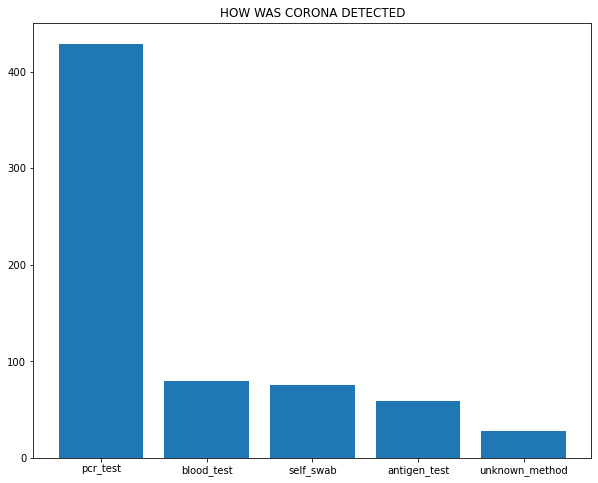

In [102]:
how_detected = res[res.LINK_ID == 'infection_how_detected']['VALUECODING_CODE'].value_counts()
plt.figure(figsize = (10,8))
plt.bar(how_detected.index, how_detected.values)
plt.title("HOW WAS CORONA DETECTED")

In [7]:
sys.path.insert(1, 'lib')

from display import Display
from study import EcovStudy, ParticipantsBuilder
from datetime import datetime, timedelta
import pandas as pd
import math 

study = EcovStudy()
print('Study:', study.name())
print('Last donation:', res['AUTHORED'].max().strftime("%Y-%m-%d"))

builder = ParticipantsBuilder(study, par, res)
par = builder 
    .add_last_donation() 
    .add_all_submissions() 
    .get() 
    .sort_values(by=['Q3'], ascending=False)

Display.header('Participants, enrollment and last donation', 'h2')
Display.frame(par, 3)
Display.text('Number of users: %d' % par.shape[0])

df = par[par['STATUS'] != 'enrolled']
Display.text(f'Left the study: {df.shape[0]}')

Study: eCOV
Last donation: 2021-11-14


Participants, enrollment and last donation

,ALP_ID,EXTERNAL_ID,STATUS,START_DATE,END_DATE,ENROLED_ON,LAST_DONATION,all,Q1,Q2,Q3,Q4a,Q4b,Q5a,Q5b,Q6
393,2376,anonymous,enrolled,2021-05-05,NaN,2021-05-05,2021-10-26,37,1,15,7,2,1,1,1,9
1764,1571,anonymous,enrolled,2021-05-28,NaN,2021-05-28,2021-10-20,25,1,12,7,1,2,1,1,0
2284,2385,anonymous,enrolled,2021-05-20,NaN,2021-05-20,2021-11-11,40,1,12,7,1,2,1,1,15


Number of users: 5615

Left the study: 327

In [32]:
a = res[(res.LINK_ID == 'when_tested') | (res.LINK_ID == 'when_tested_on_demand')]
b = res[res.LINK_ID == 'what_test_method'][['ALP_ID','AUTHORED','VALUECODING_CODE', 'QUESTIONNAIRE']]
m = pd.merge(a,b, on = ['ALP_ID', 'AUTHORED', 'QUESTIONNAIRE'], how = 'left')
c = res[res.LINK_ID == 'corona_test_result'][['ALP_ID','AUTHORED','VALUECODING_CODE', 'QUESTIONNAIRE']]
m = pd.merge(m, c, on = ['ALP_ID', 'AUTHORED', 'QUESTIONNAIRE'], how = 'left')

In [33]:
m.head()

,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE_x,LANGUAGE,TEXT,INTERACTION_ID,VALUECODING_CODE_y,VALUECODING_CODE
0,1496,1.0.0,2021-05-27,personal_info,when_tested,2020-12-17,NaN,de,Wann wurde der positive Test durchgef'c3'bchrt?,DOcSbrBJszlevnA7HRP6wFp8ENp4nE3qXs9qG13aDP0rF4...,NaN,NaN
1,1496,1.1.1,2021-09-22,corona_testing,when_tested_on_demand,2021-09-11,NaN,de,Wann wurde der Test durchgef'c3'bchrt?,HvaQSSkDUf46aZV6hF+sxruQOIgken87eB9Xnbkwh8HVAg...,self_swab,test_result_neg
2,1496,1.1.0,2021-09-20,corona_testing,when_tested_on_demand,2021-09-12,NaN,de,Wann wurde der Test durchgef'c3'bchrt?,Ael+T6BJoK26p6jSNuz7X1SX0MwI6jLM7Z6dXQmiV29wS7...,antigen_test,test_result_neg
3,1496,1.1.1,2021-10-19,corona_testing,when_tested_on_demand,2020-12-17,NaN,de,Wann wurde der Test durchgef'c3'bchrt?,dBbIKtnrGuJRT+jp930Dga4S98x9UFy/hnR0DZpMsGEIXu...,pcr_test,test_result_pos
4,1497,1.1.0,2021-07-14,corona_testing,when_tested_on_demand,2021-07-14,NaN,en,When was the test carried out?,PyDqwRvTzku40v+GxPrHpqwSANmHxc63FMA+Ruc+LRJk+f...,self_swab,test_result_neg


### By_date

In [8]:
#sys.path.insert(1, 'lib')
from by_date import date_analysis
da = date_analysis(res, _from = '28112021')

In [9]:
# da = date_analysis(res, _from = '01102021')
check = da.user_analysis()

In [10]:
check.df

,W47-W48,W48-W49,W49-W50,W50-W51,W51-W52,W52-W1,W1-W2,W2-W3,W3-W4,W4-W5,W5-W6,W6-W7
W47-W48,199.0,0.0,60.0,4.0,0.0,2.0,50.0,6.0,1.0,2.0,32.0,8.0
W48-W49,0.0,242.0,87.0,3.0,0.0,5.0,68.0,4.0,3.0,1.0,40.0,11.0
W49-W50,0.0,0.0,330.0,4.0,2.0,0.0,133.0,7.0,2.0,2.0,102.0,7.0
W50-W51,0.0,0.0,0.0,133.0,0.0,0.0,33.0,5.0,1.0,0.0,25.0,3.0
W51-W52,0.0,0.0,0.0,0.0,124.0,0.0,47.0,1.0,0.0,0.0,32.0,6.0
W52-W1,0.0,0.0,0.0,0.0,0.0,159.0,68.0,3.0,0.0,0.0,40.0,5.0
W1-W2,0.0,0.0,0.0,0.0,0.0,0.0,355.0,2.0,0.0,1.0,100.0,7.0
W2-W3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,55.0,5.0
W3-W4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.0,0.0,67.0,5.0
W4-W5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0,82.0,7.0


In [82]:
check.dates_lst

[datetime.date(2021, 11, 28),
 datetime.date(2021, 12, 5),
 datetime.date(2021, 12, 12),
 datetime.date(2021, 12, 19),
 datetime.date(2021, 12, 26),
 datetime.date(2022, 1, 2),
 datetime.date(2022, 1, 9),
 datetime.date(2022, 1, 16),
 datetime.date(2022, 1, 23),
 datetime.date(2022, 1, 30)]

In [8]:
# min_dates = res[['ALP_ID', 'AUTHORED']].groupby(['ALP_ID'], as_index = False).min()
# ids = min_dates[(min_dates.AUTHORED >= date(2021, 9, 1)) & (min_dates.AUTHORED < date(2021, 9, 8))]['ALP_ID'].values
# df = res[res.ALP_ID.isin(ids)]
# df[(df.AUTHORED>= date(2021,9,8)) & (df.AUTHORED< date(2021,9,15))]['ALP_ID'].unique().shape[0]

Text(0.5, 1.0, 'HOW MANY PEOPLE STARTED EACH WEEK')

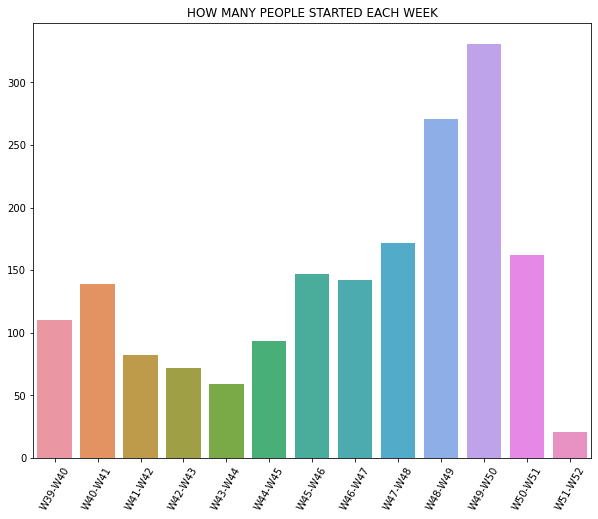

In [8]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 60)
sns.barplot(x = check.df.columns, y = np.diag(check.arr))
plt.title("HOW MANY PEOPLE STARTED EACH WEEK")


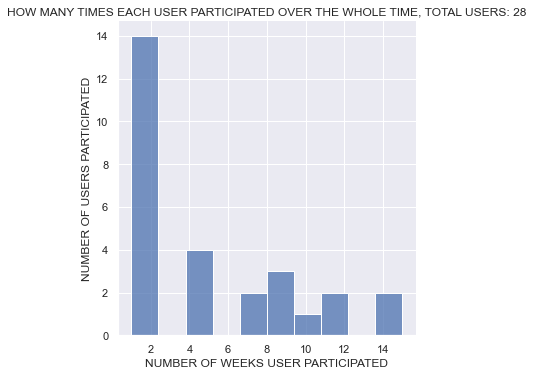

In [22]:
_, cnt = np.unique(check.members[0], return_counts = True)
plt.figure(figsize = (15,10))
sns.displot(x = cnt, bins =10)
plt.title("HOW MANY TIMES EACH USER PARTICIPATED OVER THE WHOLE TIME, TOTAL USERS: " + str(len(cnt)))
plt.xlabel("NUMBER OF WEEKS USER PARTICIPATED")
plt.ylabel("NUMBER OF USERS PARTICIPATED")

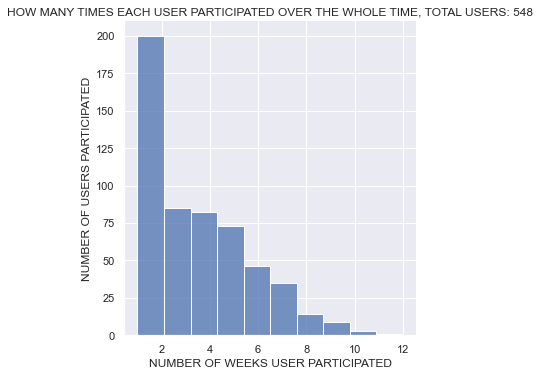

In [23]:
_, cnt = np.unique(check.members[1], return_counts = True)
plt.figure(figsize = (15,10))
sns.displot(x = cnt, bins =10)
plt.title("HOW MANY TIMES EACH USER PARTICIPATED OVER THE WHOLE TIME, TOTAL USERS:" + str(len(cnt)))
plt.xlabel("NUMBER OF WEEKS USER PARTICIPATED")
plt.ylabel("NUMBER OF USERS PARTICIPATED")

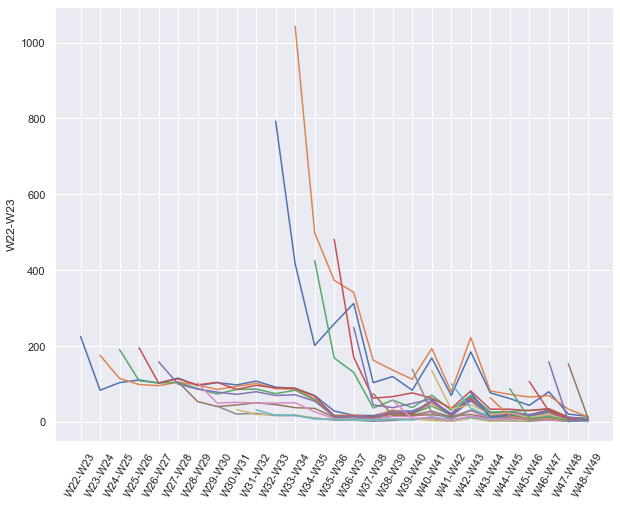

In [9]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10,8))
_=plt.xticks(rotation = 60)
for i in range(check.arr.shape[0]):
    sns.lineplot(x = check.df.columns[i:], y = check.df.iloc[i,i:])


In [7]:
def percentage_decline(arr):
    per = np.copy(arr)
    for i in range(per.shape[0]):
        tot = arr[i,i]
        per[i,i+1:] = np.round(((arr[i, i+1:] - tot)/tot)*100, 1)
    return per

In [8]:
pd.DataFrame(percentage_decline(check.arr))

,0,1,2,3,4,5,6,7,8,9,10
0,200.0,-100.0,-69.5,-98.0,-100.0,-99.0,-75.0,-97.0,-99.5,-99.0,-84.0
1,0.0,242.0,-64.0,-98.8,-100.0,-97.9,-71.9,-98.3,-98.8,-99.6,-83.5
2,0.0,0.0,330.0,-98.8,-99.4,-100.0,-59.7,-97.9,-99.4,-99.4,-69.1
3,0.0,0.0,0.0,133.0,-100.0,-100.0,-75.2,-96.2,-99.2,-100.0,-81.2
4,0.0,0.0,0.0,0.0,124.0,-100.0,-62.1,-99.2,-100.0,-100.0,-74.2
5,0.0,0.0,0.0,0.0,0.0,159.0,-57.2,-98.1,-100.0,-100.0,-74.8
6,0.0,0.0,0.0,0.0,0.0,0.0,355.0,-99.4,-100.0,-99.7,-71.8
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,-100.0,-100.0,-71.1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.0,-100.0,-68.6
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0,-65.0


In [30]:
[True if i%4==0 else False for i in range(10)]

In [31]:
def weekly_view(df, week_num):
    plt.figure(figsize = (15,10))
    sns.lineplot(x = df.columns[week_num:], y = df.iloc[week_num, week_num:])
    plt.xticks(rotation = 60)

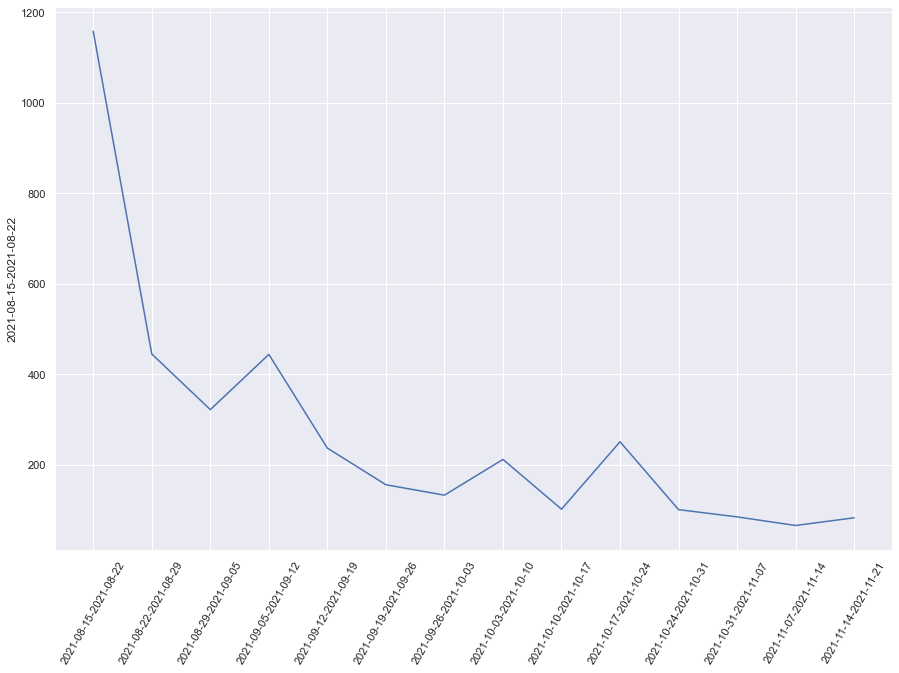

In [32]:
weekly_view(check.df, 2)

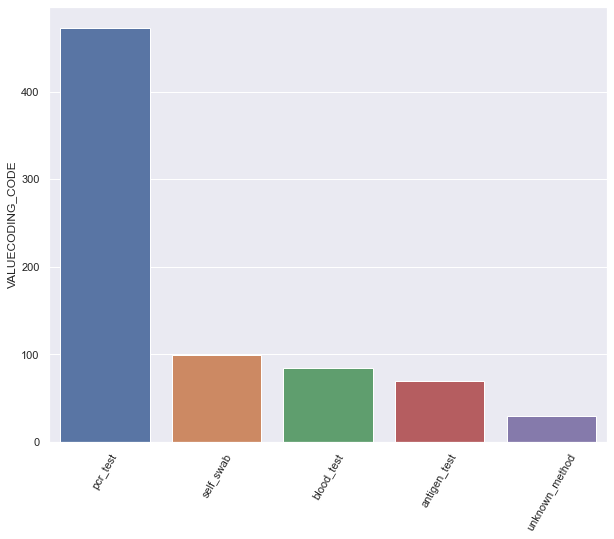

In [40]:
how_infected = res[res.LINK_ID == 'infection_how_detected']['VALUECODING_CODE'].value_counts()
plt.figure(figsize = (10,8))
sns.barplot(x = how_infected.index, y = how_infected, orient = 'v')
plt.xticks(rotation = 60)

In [4]:
from pos_vs_vaccine_status import all_vs_vaccine

In [5]:
a = all_vs_vaccine(res)
a = a.get()

In [9]:
a.df.head()

,ALP_ID,AUTHORED_x,when_tested_positive,AUTHORED_y,VACCINE1,VAC1TIME,VACCINE2,VAC2TIME,BOOSTER_TIME,first_test_date,status
0,1496,2021-09-22,2021-09-11,2021-05-30,moderna,2021-05-30,NaN,NaT,NaT,2020-12-17,fully_vaccinated
1,1496,2021-09-20,2021-09-12,2021-05-30,moderna,2021-05-30,NaN,NaT,NaT,2020-12-17,fully_vaccinated
2,1496,2021-10-19,2020-12-17,2021-05-30,moderna,2021-05-30,NaN,NaT,NaT,2020-12-17,unvaccinated
3,1496,2021-11-17,2021-11-16,2021-05-30,moderna,2021-05-30,NaN,NaT,NaT,2020-12-17,fully_vaccinated
4,1497,2021-07-14,2021-07-14,2021-05-18,astra_zeneca,2021-05-12,NaN,NaT,NaT,2021-06-26,infected


In [10]:
ids = res[(res.LINK_ID == 'study_discovery') & (res.VALUECODING_CODE == 'public_event')].ALP_ID.unique()
check = a.df[a.df['ALP_ID'].isin(ids)][['ALP_ID','when_tested_positive','VACCINE1','VAC1TIME','VACCINE2' ,'VAC2TIME', 'first_test_date', 'status']]


In [11]:
check['when_tested_positive'] = date(2021, 9, 1)
check['s2'] = check.apply(a.get_status, axis = 1)

In [12]:
check['s2'].value_counts()

In [13]:
def fun(x):
    if pd.isnull(x.VAC1TIME):
        return -1
    else:
        return (x.VAC1TIME-x.first_test_date).days

check['fun'] = check.apply(fun, axis = 1)
check[(check.fun>0)]

,ALP_ID,when_tested_positive,VACCINE1,VAC1TIME,VACCINE2,VAC2TIME,first_test_date,status,s2,fun
9875,3280,2021-09-01,pfizer,2021-05-12,NaN,NaT,2020-03-17,fully_vaccinated,fully_vaccinated,421
10042,3300,2021-09-01,pfizer,2021-02-06,pfizer,2021-02-27,2020-04-20,partially_vaccinated,partially_vaccinated,292
10043,3300,2021-09-01,pfizer,2021-02-06,pfizer,2021-02-27,2020-04-20,infected,partially_vaccinated,292
10044,3300,2021-09-01,pfizer,2021-02-06,pfizer,2021-02-27,2020-04-20,unvaccinated,partially_vaccinated,292
10045,3300,2021-09-01,pfizer,2021-02-06,pfizer,2021-02-27,2020-04-20,fully_vaccinated,partially_vaccinated,292
...,...,...,...,...,...,...,...,...,...,...
29228,6285,2021-09-01,pfizer,2021-06-16,NaN,NaT,2020-12-17,unvaccinated,fully_vaccinated,181
29232,6347,2021-09-01,pfizer,2021-06-16,NaN,NaT,2020-12-19,unvaccinated,fully_vaccinated,179
29239,6431,2021-09-01,pfizer,2021-04-28,NaN,NaT,2020-11-25,unvaccinated,fully_vaccinated,154
29244,6461,2021-09-01,pfizer,2021-06-07,pfizer,2021-07-07,2020-09-24,unvaccinated,fully_vaccinated,256


In [7]:
from pos_vs_vaccine_status import pos_vs_vaccine
vac = pos_vs_vaccine(res)
vac = vac.get()

In [8]:
vac.df.shape

In [30]:
vac.df.status.value_counts()

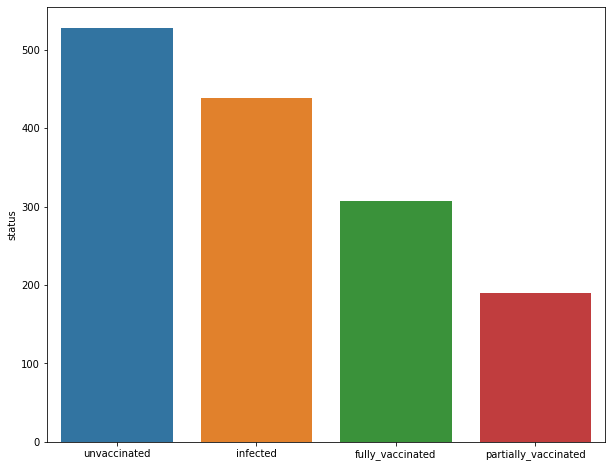

In [31]:
plt.figure(figsize= (10,8))
sns.barplot(x = vac.df.status.value_counts().index,  y= vac.df.status.value_counts())

In [9]:
from helper_tool import helper

In [32]:
a = helper(res)
m3 = a.merged()
when = a.when_tested()
dates = a.important_dates()
how = a.how_detected()
res = a.test_result()

In [33]:
b = when.drop_duplicates().groupby(['AUTHORED', 'ALP_ID']).count().test_date
cnt, ii= np.unique(b[np.argsort(-1*b)], return_counts = True)
for i, j in zip(reversed(cnt), reversed(ii)):
    if j <15:
        print("ALP ID = ",b[b==i].index[0][1],"ON DATE ",b[b==i].index[0][0] ,"HAS REPORTED ", b[b==i].values[0], "DISTINCT TESTS ON A SINGLE DAY", "Active days:", dates[dates.ALP_ID ==(b[b==i].index[0][1])].active_days.values[0])


ALP ID =  7374 ON DATE  2021-11-11 HAS REPORTED  23 DISTINCT TESTS ON A SINGLE DAY Active days:  22
ALP ID =  6967 ON DATE  2021-10-11 HAS REPORTED  22 DISTINCT TESTS ON A SINGLE DAY Active days:  16
ALP ID =  7762 ON DATE  2021-11-29 HAS REPORTED  21 DISTINCT TESTS ON A SINGLE DAY Active days:  6
ALP ID =  3224 ON DATE  2021-08-03 HAS REPORTED  18 DISTINCT TESTS ON A SINGLE DAY Active days:  120
ALP ID =  4606 ON DATE  2021-08-18 HAS REPORTED  17 DISTINCT TESTS ON A SINGLE DAY Active days:  63
ALP ID =  5153 ON DATE  2021-10-06 HAS REPORTED  14 DISTINCT TESTS ON A SINGLE DAY Active days:  48
ALP ID =  6131 ON DATE  2021-09-07 HAS REPORTED  13 DISTINCT TESTS ON A SINGLE DAY Active days:  83
ALP ID =  6548 ON DATE  2021-10-04 HAS REPORTED  12 DISTINCT TESTS ON A SINGLE DAY Active days:  64
ALP ID =  2529 ON DATE  2021-09-22 HAS REPORTED  11 DISTINCT TESTS ON A SINGLE DAY Active days:  158
ALP ID =  6740 ON DATE  2021-10-11 HAS REPORTED  10 DISTINCT TESTS ON A SINGLE DAY Active days:  17

In [101]:
when.test_date = pd.to_datetime(when.test_date).dt.date
when['week_num'] = when.AUTHORED.apply(lambda x: x.isocalendar()[1])
when.head()

,ALP_ID,AUTHORED,QUESTIONNAIRE,test_date,week_num
330,1500,2021-07-10,personal_info,2021-01-10,27
880,1512,2021-09-21,personal_info,2021-01-11,38
1661,1527,2021-06-20,personal_info,2020-11-23,24
5735,1595,2021-07-08,personal_info,2020-12-01,27
7028,1625,2021-06-21,personal_info,2020-03-30,25


In [102]:
dates['active_days'] = dates['active_days'].apply(lambda x: int(x))
ids = dates['ALP_ID'][dates['active_days'] >=60].values
active = when[when.ALP_ID.isin(ids)]

per_person = active.groupby(['ALP_ID', 'week_num'], as_index = False).count()
per_week = active.groupby( ['week_num'], as_index = False).count().test_date

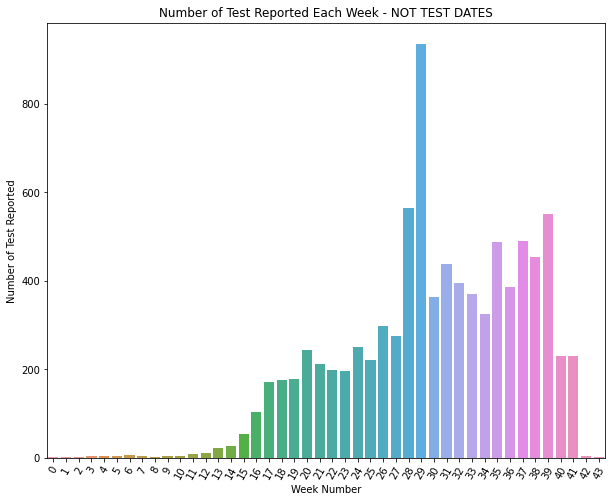

In [104]:
plt.figure(figsize = (10,8))
sns.barplot(x = per_week.index, y = per_week.values)
plt.xticks(rotation = 60)
plt.xlabel("Week Number")
plt.ylabel("Number of Test Reported")
plt.title("Number of Test Reported Each Week - NOT TEST DATES")

In [105]:
def participation(per_person, num = 1496):
    plt.figure(figsize = (10,8))
    t = per_person[per_person.ALP_ID == num]
    sns.barplot(x = t.week_num, y = t.test_date)
    plt.title("ALP_ID ="+str(num))
    plt.xlabel("weeks")
    plt.ylabel("number of tests")

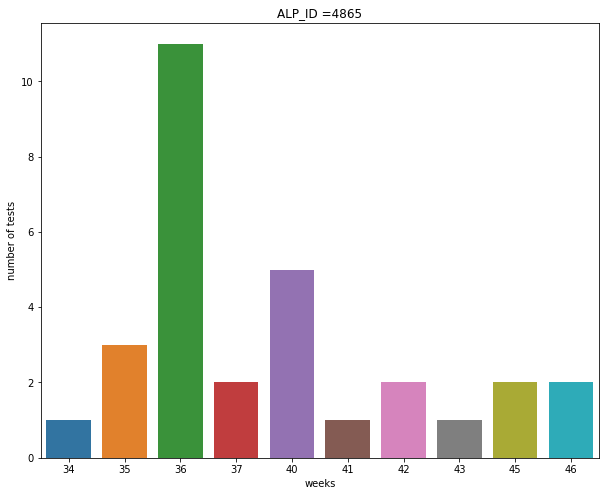

In [106]:
participation(per_person, num = 4865)

In [96]:
vac1 = a.answer('when_vaccinated_first_time', name = 'vac1time')
vac2 = a.answer('when_vaccinated_second_time', name = 'vac2time')
booster = a.answer('has_received_booster_vacciation', name = 'booster_status')

In [130]:
booster =  booster[booster['booster_status'] == 'yes']
booster['week_num'] = booster.AUTHORED.apply(lambda x: x.isocalendar()[1])
b = booster.groupby(['week_num'], as_index = False).count()

In [119]:
vac1.vac1time = pd.to_datetime(vac1.vac1time, errors = 'coerce').dt.date
vac2.vac2time = pd.to_datetime(vac2.vac2time, errors = 'coerce').dt.date
vac1['week_num'] = vac1.AUTHORED.apply(lambda x: x.isocalendar()[1])
vac2['week_num'] = vac2.AUTHORED.apply(lambda x: x.isocalendar()[1])

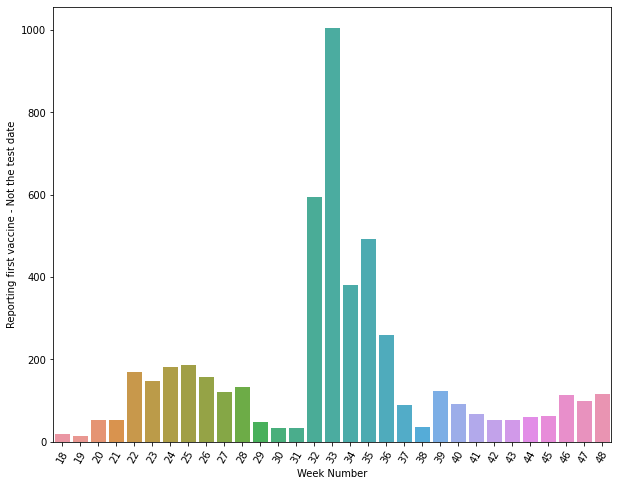

In [125]:
v1 = vac1.groupby(['week_num'], as_index = False).count()
v2 = vac2.groupby(['week_num'], as_index = False).count()
plt.figure(figsize = (10,8))
sns.barplot(x = v1.week_num, y = v1.vac1time)
plt.xticks(rotation = 60)
plt.xlabel("Week Number")
plt.ylabel("Reporting first vaccine - Not the test date")

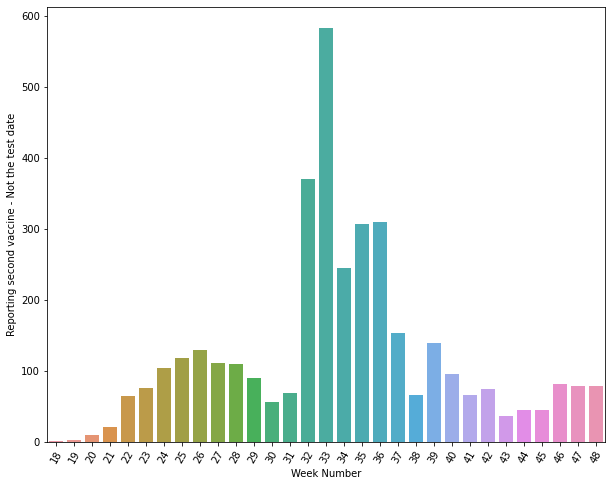

In [124]:
plt.figure(figsize = (10,8))
sns.barplot(x = v2.week_num, y = v2.vac2time)
plt.xticks(rotation = 60)
plt.xlabel("Week Number")
plt.ylabel("Reporting second vaccine - Not the test date")

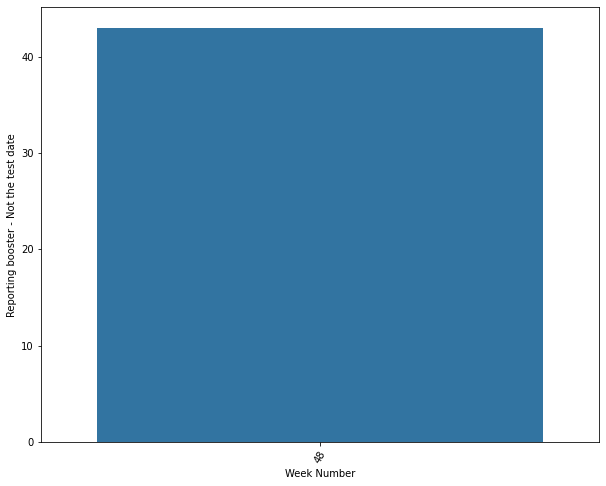

In [132]:
plt.figure(figsize = (10,8))
sns.barplot(x = b.week_num, y = b.booster_status)
plt.xticks(rotation = 60)
plt.xlabel("Week Number")
plt.ylabel("Reporting booster - Not the test date")

### The Engine

In [16]:
from Engine_tool import Engine
from helper_tool import helper

In [17]:
h = helper(res)
a = Engine(res)
obj = a.get_status()

In [18]:
obj.mat.shape

(9273, 73)

In [37]:
suspended = par[par.STATUS == 'suspended'].ALP_ID.unique()

In [38]:
nineweekinactive = obj.allIds[(np.isin(obj.mat[:, -1], np.array([-1]))) & (np.isin(obj.mat[:, -2], np.array([-1])))]

In [41]:
nineweekinactive.shape[0] - np.sum(np.isin(nineweekinactive, suspended))

3937

In [32]:
iid = obj.allIds[np.isin(obj.mat[:, -1], np.array([2]))]
qs = []
for ide in iid:
    last_week = res[res.ALP_ID == ide]
    last_week.loc[:,'week'] = last_week.AUTHORED.apply(lambda x: x.isocalendar()[:2])
    last_week = last_week[last_week.week == (2022, 3)]
    qs+=last_week.QUESTIONNAIRE.unique().tolist()
qs = pd.Series(qs)

/Users/raza.ali/Documents/Analysis/env/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [33]:
qs.value_counts()

covid_exposition              118
corona_testing                 73
covid_booster_vaccine          67
vaccination_side_effects_c     55
corona_symptoms                19
covid_second_vaccine           12
vaccination_side_effects_b     10
covid_first_vaccine             9
E1_exit_interview               7
vaccination_side_effects_a      2
dtype: int64

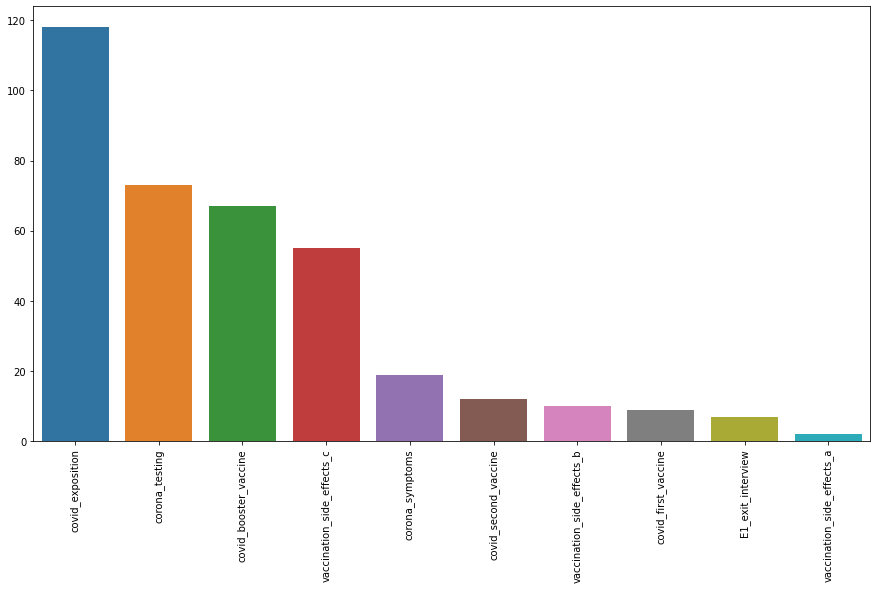

In [79]:
plt.figure(figsize= (15,8))
sns.barplot(x = qs.value_counts().index, y = qs.value_counts().values)
_ = plt.xticks(rotation = 90)

In [21]:
print("TOTAL NUMBER OF PARTICIPANTS", obj.mat.shape[0])
print("PARTICIPANTS ACTIVE LAST WEEK", np.sum(np.isin(obj.mat[:, -1], np.array([0,1,2]))))
print("Inactive participants last week", np.sum(np.isin(obj.mat[:, -1], np.array([-1]))))
print("people who filled anything last week", np.sum(np.isin(obj.mat[:, -1], np.array([1]))))
print("people who revived last week", np.sum(np.isin(obj.mat[:, -1], np.array([2]))))
print("people who didn't do anything last week but still are active", np.sum(np.isin(obj.mat[:, -1], np.array([0]))))

TOTAL NUMBER OF PARTICIPANTS 8613
PARTICIPANTS ACTIVE LAST WEEK 2710
Inactive participants last week 5903
people who filled anything last week 111
people who revived last week 10
people who didn't do anything last week but still are active 2589


In [45]:
iid = obj.allIds[np.isin(obj.mat[:, -1], np.array([2]))]
r = h.important_dates()
r = r[r.ALP_ID.isin(iid)]

r['week'] = r['START_DATE'].apply(lambda x: x.isocalendar()[:2])

r = r.groupby(['week'], as_index = False).count()

/var/folders/t6/1krtm78n7sg32l4dh77g43nm0000gn/T/ipykernel_47811/3739704832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['week'] = r['START_DATE'].apply(lambda x: x.isocalendar()[:2])


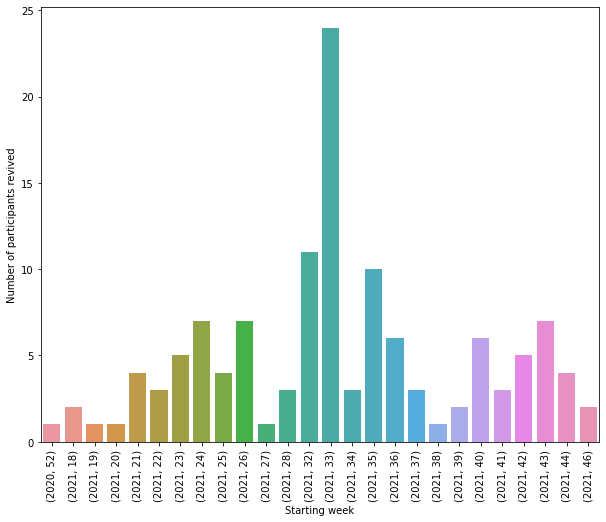

In [47]:
plt.figure(figsize = (10,8))
sns.barplot(x = r.week, y = r.ALP_ID)
_ = plt.xticks(rotation = 90)
_ = plt.xlabel("Starting week")
_ = plt.ylabel("Number of participants revived")

In [68]:
ii = (obj.mat[:, 39] == -2) & (obj.mat[:, 40] == 1)
print("total number who joined in week October are", np.sum(ii))
print("number of active who joined in October are: ", np.sum(np.isin(obj.mat[ii, -1], np.array([0,1,2]))))
print("percentage:",100*(np.sum(np.isin(obj.mat[ii, -1], np.array([0,1,2])))/np.sum(ii)),"%")


total number who joined in week October are 117
number of active who joined in October are:  31
percentage: 26.495726495726498 %


In [61]:
np.sum(np.isin(obj.mat[ii, -1], np.array([0,1,2])))

31

Text(0, 0.5, 'Revival percentage')

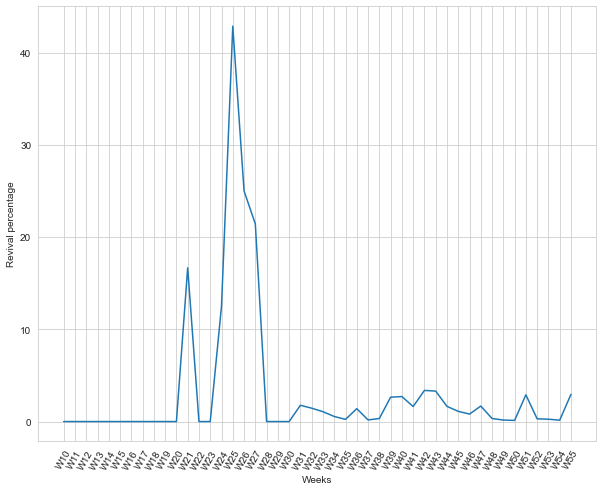

In [13]:
xx = obj.week_lst[1:]
sns.set_style("whitegrid")
plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = obj.revival[:])
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
plt.ylabel("Revival percentage")

Text(0, 0.5, 'Inactive percentage')

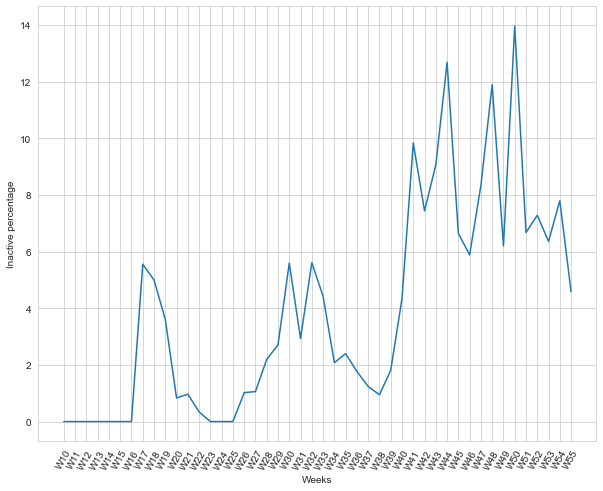

In [14]:
xx = obj.week_lst[1:]
sns.set_style("whitegrid")
plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = obj.inactive[:])
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
plt.ylabel("Inactive percentage")

Text(0, 0.5, 'Answering percentage')

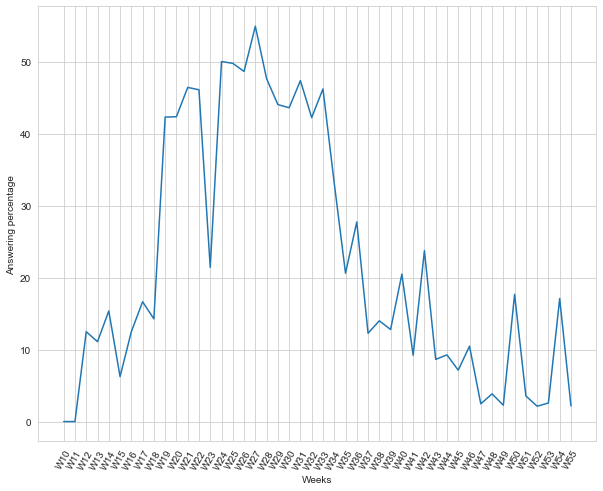

In [15]:
xx = obj.week_lst[1:]
sns.set_style("whitegrid")
plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = obj.answering[:])
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
plt.ylabel("Answering percentage")

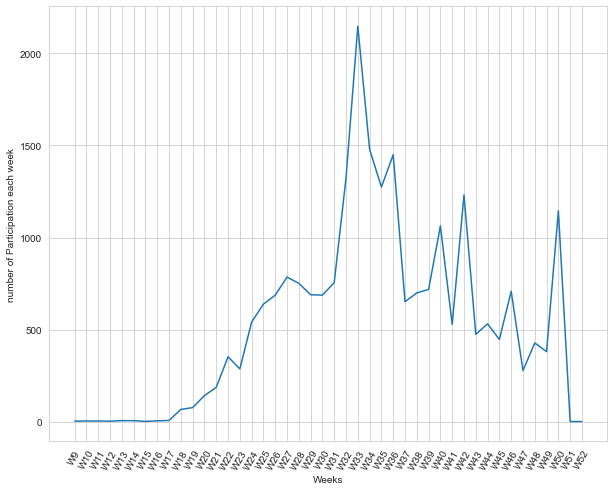

In [311]:
# Each week participation

p = np.sum(obj.mat == 1, axis = 0)[obj.start_week:]
xx = obj.week_lst
sns.set_style("whitegrid")
plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = p)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
plt.ylabel("number of Participation each week")

In [19]:
###  percentage each week
states = np.array([-1,0,1,2])
inactive = np.array([-1])
revival = np.array([2])
enrolled = np.array([0])
answered = np.array([1])

inActive = []
rev = []
enroll = []
ans = []
for w in range(obj.start_week, 53):
    week = obj.mat[:, w]
    total_active = np.sum(np.isin(week, states))
    if total_active == 0:
        inActive.append(0)
        rev.append(0)
        enroll.append(0)
        ans.append(0)
        continue
    inActive.append((np.sum(np.isin(week, inactive))/total_active)*100)
    rev.append((np.sum(np.isin(week, revival))/total_active)*100)
    enroll.append((np.sum(np.isin(week, enrolled))/total_active)*100)
    ans.append((np.sum(np.isin(week, answered))/total_active)*100)

Text(0, 0.5, 'percentage of inactive each week')

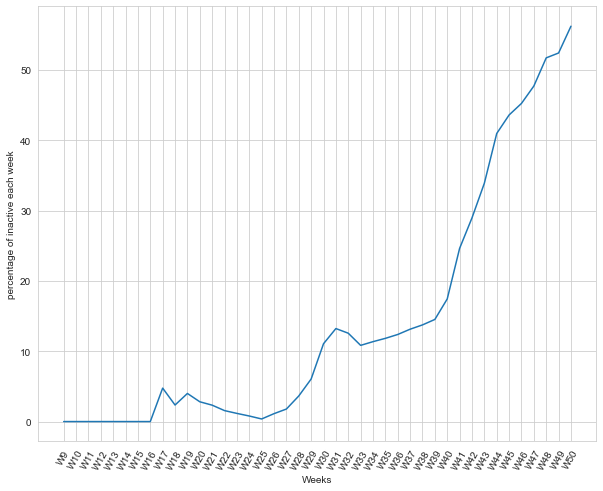

In [20]:
xx = obj.week_lst[:-2]
sns.set_style("whitegrid")
plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = inActive[:-2])
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
plt.ylabel("percentage of inactive each week")

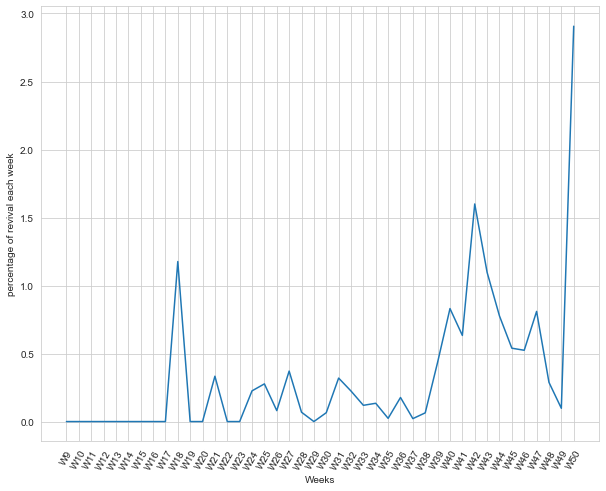

In [315]:
xx = obj.week_lst[:-2]
sns.set_style("whitegrid")
plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = rev[:-2])
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
plt.ylabel("percentage of revival each week")

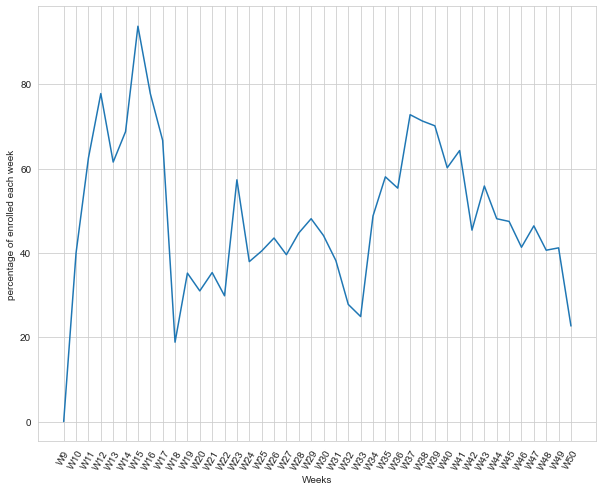

In [316]:
xx = obj.week_lst[:-2]
sns.set_style("whitegrid")
plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = enroll[:-2])
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
plt.ylabel("percentage of enrolled each week")

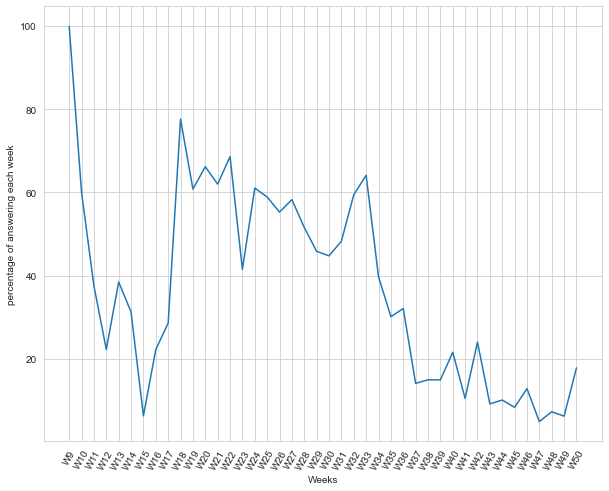

In [317]:
xx = obj.week_lst[:-2]
sns.set_style("whitegrid")
plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = ans[:-2])
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
plt.ylabel("percentage of answering each week")

In [12]:
obj.mat[:5, 20:25]

array([[-2.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  0.,  0.,  0.],
       [-2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1.],
       [-2., -2., -2., -2., -2.]])

In [25]:
np.sum(obj.mat[:, 51] == 2)

102

In [24]:
print("NUMBER OF PEOPLE INACTIVE IN 49th WEEK ARE " ,np.sum(obj.mat[:, 49] == -1), ", TOTAL NUMBER OF PARTICIPANTS IN 49TH WEEK  ",np.sum(obj.mat[:, 49] != -2))
print("NUMBER OF PEOPLE INACTIVE IN 50th WEEK ARE " ,np.sum(obj.mat[:, 50] == -1), ", TOTAL NUMBER OF PARTICIPANTS IN 50TH WEEK  ",np.sum(obj.mat[:, 50] != -2))
print("NUMBER OF PEOPLE INACTIVE IN 51st WEEK ARE " ,np.sum(obj.mat[:, 51] == -1), ", TOTAL NUMBER OF PARTICIPANTS IN 51st WEEK  ",np.sum(obj.mat[:, 51] != -2))
print()

print("-------------------------------------")
print("OF ALL THE INACTIVE PARTICIPANTS IN 49TH WEEK, HOW MANY REVIVED IN 50TH WEEK: ",np.sum(obj.mat[obj.mat[:, 49] == -1, 50] == 2))
print("OF ALL THE INACTIVE PARTICIPANTS IN 50TH WEEK, HOW MANY REVIVED IN 51st WEEK: ",np.sum(obj.mat[obj.mat[:, 50] == -1, 51] == 2))
print("OF ALL THE INACTIVE PARTICIPANTS IN 49TH WEEK, HOW MANY REVIVED IN 52ND WEEK: ",np.sum(obj.mat[obj.mat[:, 51] == -1, 52] == 2))

NUMBER OF PEOPLE INACTIVE IN 49th WEEK ARE  3222 , TOTAL NUMBER OF PARTICIPANTS IN 49TH WEEK   6144
NUMBER OF PEOPLE INACTIVE IN 50th WEEK ARE  3635 , TOTAL NUMBER OF PARTICIPANTS IN 50TH WEEK   6462
NUMBER OF PEOPLE INACTIVE IN 51st WEEK ARE  3725 , TOTAL NUMBER OF PARTICIPANTS IN 51st WEEK   6575

-------------------------------------
OF ALL THE INACTIVE PARTICIPANTS IN 49TH WEEK, HOW MANY REVIVED IN 50TH WEEK:  4
OF ALL THE INACTIVE PARTICIPANTS IN 50TH WEEK, HOW MANY REVIVED IN 51st WEEK:  102
OF ALL THE INACTIVE PARTICIPANTS IN 49TH WEEK, HOW MANY REVIVED IN 52ND WEEK:  10


In [19]:
from helper_tool import helper
h = helper(res)

In [20]:
a = Engine(res)
obj = a.get_status()
c = h.answer("study_discovery", 'channel')
chan = ['public_event', 'facebook_ad', 'google_search', 'other_source',
       'friends_family', 'facebook_group', 'poster', 'general_poster']
people = [c[c.channel == i].ALP_ID.unique() for i in chan]

In [21]:
ii = np.isin(obj.allIds, people[0])
people_from_channel = obj.mat[ii, :]

### Channel == Public_event

In [26]:
###  percentage each week
states = np.array([-1,0,1,2])
inactive = np.array([-1])
revival = np.array([2])
enrolled = np.array([0])
answered = np.array([1])

inActive = []
rev = []
enroll = []
ans = []
total = []
for w in range(obj.start_week, obj.total_weeks):
    week = people_from_channel[:, w]
    total_active = np.sum(np.isin(week, states))
    total.append(total_active)
    if total_active == 0:
        inActive.append(0)
        rev.append(0)
        enroll.append(0)
        ans.append(0)
        continue
    inActive.append((np.sum(np.isin(week, inactive))/total_active)*100)
    rev.append((np.sum(np.isin(week, revival))/total_active)*100)
    enroll.append((np.sum(np.isin(week, enrolled))/total_active)*100)
    ans.append((np.sum(np.isin(week, answered))/total_active)*100)

In [27]:
obj.total_weeks

65

Text(0.5, 0.98, 'CHANNEL == PUBLIC_EVENT')

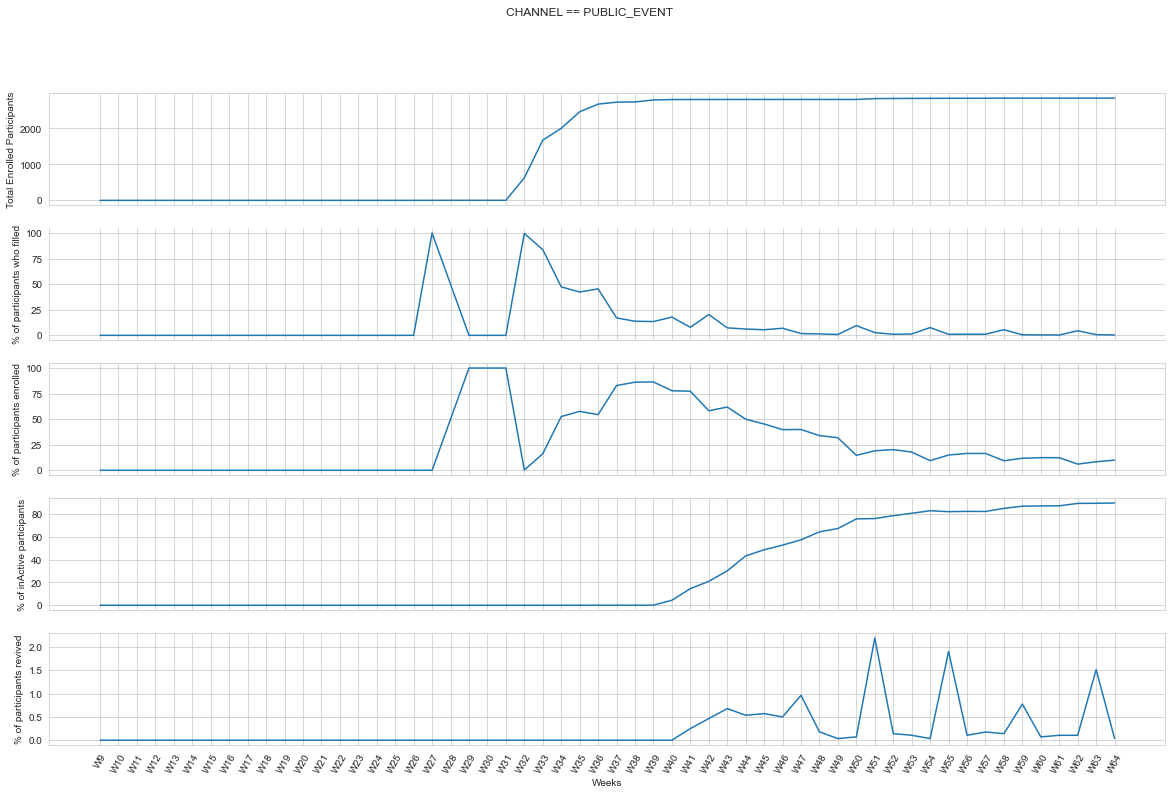

In [28]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize = (20,12), sharex = True)
for side in ('top', 'right'):
    ax2.spines[side].set_visible(False)
    

xx = obj.week_lst[:]
sns.set_style("whitegrid")
#plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = total[:], ax = ax1)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax1.set_ylabel("Total Enrolled Participants")




sns.lineplot(x = xx, y = ans[:], ax = ax2)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax2.set_ylabel("% of participants who filled")

sns.lineplot(x = xx, y = enroll[:], ax = ax3)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax3.set_ylabel("% of participants enrolled")

sns.lineplot(x = xx, y = inActive[:], ax = ax4)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax4.set_ylabel("% of inActive participants")

sns.lineplot(x = xx, y = rev[:], ax = ax5)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax5.set_ylabel("% of participants revived")

plt.suptitle("CHANNEL == PUBLIC_EVENT")

### Channel != Public_event

In [22]:
ii = np.isin(obj.allIds, people[0])
people_from_channel = obj.mat[~ii, :]

In [23]:
###  percentage each week
states = np.array([-1,0,1,2])
inactive = np.array([-1])
revival = np.array([2])
enrolled = np.array([0])
answered = np.array([1])

inActive = []
rev = []
enroll = []
ans = []
total = []
for w in range(obj.start_week, obj.total_weeks):
    week = people_from_channel[:, w]
    total_active = np.sum(np.isin(week, states))
    total.append(total_active)
    if total_active == 0:
        inActive.append(0)
        rev.append(0)
        enroll.append(0)
        ans.append(0)
        continue
    inActive.append((np.sum(np.isin(week, inactive))/total_active)*100)
    rev.append((np.sum(np.isin(week, revival))/total_active)*100)
    enroll.append((np.sum(np.isin(week, enrolled))/total_active)*100)
    ans.append((np.sum(np.isin(week, answered))/total_active)*100)

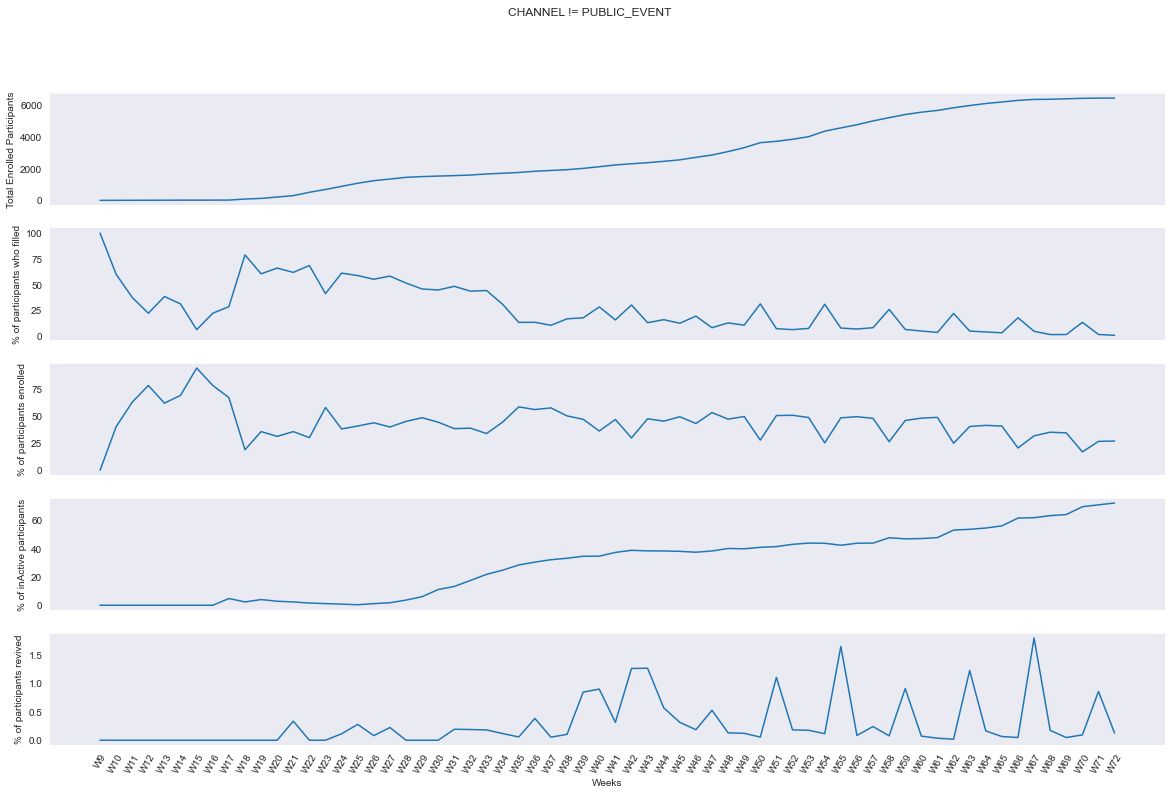

In [24]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize = (20,12), sharex = True)
for side in ('top', 'right'):
    ax2.spines[side].set_visible(False)
    

xx = obj.week_lst[:]
sns.set_style("whitegrid")
# plt.figure(figsize = (10,8))
sns.lineplot(x = xx, y = total[:], ax = ax1)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax1.set_ylabel("Total Enrolled Participants")




sns.lineplot(x = xx, y = ans[:], ax = ax2)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax2.set_ylabel("% of participants who filled")

sns.lineplot(x = xx, y = enroll[:], ax = ax3)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax3.set_ylabel("% of participants enrolled")

sns.lineplot(x = xx, y = inActive[:], ax = ax4)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax4.set_ylabel("% of inActive participants")

sns.lineplot(x = xx, y = rev[:], ax = ax5)
plt.xticks(rotation = 60)
plt.xlabel("Weeks")
ax5.set_ylabel("% of participants revived")

plt.suptitle("CHANNEL != PUBLIC_EVENT")
plt.savefig("without_public_event.jpg")

In [29]:
res.head()

,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT
0,1496,1.2.0,2021-08-11,corona_testing_and_symptoms,are_new_symptoms,NaN,no,de,In den letzten 7 Tagen:\\n2\t\\n3\tHatten Sie ...
1,1496,1.2.0,2021-08-11,corona_testing_and_symptoms,did_get_tested,NaN,no,de,In den letzten 7 Tagen:\\n5\t\\n6\tWurden Sie ...
2,1496,1.2.0,2021-08-05,corona_testing_and_symptoms,are_new_symptoms,NaN,no,de,In den letzten 7 Tagen:\\n8\t\\n9\tHatten Sie ...
3,1496,1.2.0,2021-08-05,corona_testing_and_symptoms,did_get_tested,NaN,no,de,In den letzten 7 Tagen:\\n11\t\\n12\tWurden Si...
4,1496,1.2.0,2021-07-07,corona_testing_and_symptoms,are_new_symptoms,NaN,no,de,In den letzten 7 Tagen:\\n14\t\\n15\tHatten Si...


### Channel

In [44]:
from helper_tool import helper

In [45]:
h = helper(res)

In [32]:
c = h.answer("study_discovery", 'channel')
chan = ['public_event', 'facebook_ad', 'google_search', 'other_source',
       'friends_family', 'facebook_group', 'poster', 'general_poster']
people = [c[c.channel == i].ALP_ID.unique() for i in chan]

In [33]:
imp = h.important_dates()

In [34]:
active = []
for i in range(len(people)):
    active.append(len(imp[(imp.ALP_ID.isin(people[i])) & (imp.active_days >60)].ALP_ID.unique()))

In [35]:
per = []
for i in range(len(people)):
    per.append((active[i]/people[i].shape[0])*100)

<AxesSubplot:>

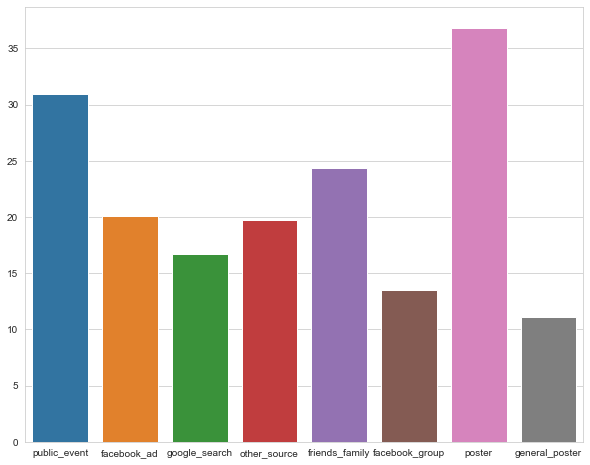

In [36]:
plt.figure(figsize = (10,8))
sns.barplot(x = chan, y = per)

In [194]:
pd.Series(per, index = chan)

In [46]:
exit = h.answer("exit_reason", 'text')
exit = exit[(exit.AUTHORED >= date(2022, 1, 10)) & ((exit.AUTHORED < date(2022, 1, 26)))]
exit.text.value_counts()
#plt.figure(figsize = (10,8))
#sns.barplot(x = exit.text.value_counts().index, y = exit.text.value_counts().values)

botehred_by_notifications    7
no_time                      6
personal_data                4
dislike_app                  4
other                        2
no_interest                  1
Name: text, dtype: int64

In [47]:
exit.ALP_ID.unique().shape[0]

16

In [122]:
exit = h.answer("exit_reason", 'text')
exit = exit[(exit.AUTHORED >= date(2021, 10, 10)) & ((exit.AUTHORED < date(2021, 11, 10)))]
exit.text.value_counts()
#plt.figure(figsize = (10,8))
#sns.barplot(x = exit.text.value_counts().index, y = exit.text.value_counts().values)

In [123]:
exit.ALP_ID.unique().shape[0]

In [198]:
a.answer("additional_reason", 'text')

,ALP_ID,AUTHORED,QUESTIONNAIRE,text
24591,1938,2021-10-29,E1_exit_interview,"Nichts neues, immer die selben Fragen, keine F..."
55484,2514,2021-09-29,E1_exit_interview,Seit vollem Impfschutz kaum mehr Schnelltests ...
74578,2885,2021-10-13,E1_exit_interview,"Ich bin geimpft, gesund und habe zu der Studie..."
88357,3083,2021-09-29,E1_exit_interview,ich bin bereits geimpft.
92681,3191,2021-09-29,E1_exit_interview,Ich habe keine Symptome und wurde auch nicht g...
106152,3503,2021-10-27,E1_exit_interview,Habe nur f'c3'bcr die Medis daran teilgenomm...
112265,3641,2021-10-31,E1_exit_interview,Ich sehe keinen Sinn mehr darin noch Monate na...
112948,3656,2021-10-27,E1_exit_interview,Medimeisterschaften are over
145108,4410,2021-10-06,E1_exit_interview,I never get tested so there is no point in par...
145374,4416,2021-10-06,E1_exit_interview,The Study was Part of a Hygiene Concept of a F...


In [30]:
# import numpy as np
# import pandas as pd
# import datetime
# from datetime import date
# from datetime import timedelta
# import math

# class date_analysis():
    
#     # _from must have a syntax: 'ddmmyyyy'
    
#     def __init__(self, res, _from, to = 0):
#         self.res = res
#         self._from = datetime.datetime.strptime(_from, "%d%m%Y").date()
#         if ~to:
#             self.to = date.today()
#         else:
#             self.to = to
#         self.numweeks = math.ceil((self.to - self._from).days/7)
#         self.dates_lst = [self._from + timedelta(days = i*7) for i in range(self.numweeks)]
#         self.col_names = list(map(lambda x: x.isocalendar()[1], self.dates_lst))
#         self.col_names=['W'+str(i)+ "-" + 'W'+str(j) for i,j in zip(self.col_names, self.col_names[1:])]
     
    

#     def user_analysis(self):
#         self.min_dates = self.res[['ALP_ID', 'AUTHORED']].groupby(['ALP_ID'], as_index = False).min()
#         self.arr = np.zeros((len(self.dates_lst)-1, len(self.dates_lst)-1))
#         self.members = []
#         self.qs = []

#         for cnt, (s,e) in enumerate(zip(self.dates_lst, self.dates_lst[1:])):
#             lst = []
#             qs = []
#             self.ids = self.min_dates[(self.min_dates['AUTHORED'] >= s) & (self.min_dates['AUTHORED'] < e)]['ALP_ID'].values
#             self.df = self.res[self.res.ALP_ID.isin(self.ids)]
#             for col ,(s1,e1) in  enumerate(zip(self.dates_lst[cnt:], self.dates_lst[cnt+1:])):
#                 lst+=self.df[(self.df.AUTHORED >= s1) & (self.df.AUTHORED < e1)]['ALP_ID'].unique().tolist()
#                 qs+=self.df[(self.df.AUTHORED >= s1) & (self.df.AUTHORED < e1)]['QUESTIONNAIRE'].unique().tolist()
#                 self.arr[cnt, col+cnt] = self.df[(self.df.AUTHORED >= s1) & (self.df.AUTHORED < e1)]['ALP_ID'].unique().shape[0]
#             self.members.append(lst)
#             self.qs.append(qs)
            
       
#         #col_names = [str(i)+ "-" + str(j) for i,j in zip(self.dates_lst, self.dates_lst[1:])]
#         #row_names = [str(i)+ "-" + str(j) for i,j in zip(self.dates_lst, self.dates_lst[1:])]
#         self.df = pd.DataFrame(self.arr, columns = self.col_names, index = self.col_names)
#         return self
            
            
        
    
        
        
    
            

In [31]:
from by_date import date_analysis
a = date_analysis(res, '01102021')

In [32]:
a.user_analysis()

In [33]:
a.df

,W39-W40,W40-W41,W41-W42,W42-W43,W43-W44,W44-W45,W45-W46,W46-W47,W47-W48,W48-W49,W49-W50,W50-W51
W39-W40,110.0,21.0,31.0,14.0,13.0,6.0,10.0,1.0,7.0,2.0,13.0,9.0
W40-W41,0.0,139.0,48.0,25.0,24.0,14.0,23.0,7.0,12.0,9.0,17.0,8.0
W41-W42,0.0,0.0,82.0,10.0,11.0,7.0,7.0,2.0,4.0,0.0,6.0,0.0
W42-W43,0.0,0.0,0.0,72.0,13.0,7.0,7.0,3.0,6.0,3.0,10.0,4.0
W43-W44,0.0,0.0,0.0,0.0,59.0,9.0,11.0,3.0,7.0,5.0,11.0,7.0
W44-W45,0.0,0.0,0.0,0.0,0.0,93.0,20.0,6.0,14.0,11.0,19.0,6.0
W45-W46,0.0,0.0,0.0,0.0,0.0,0.0,147.0,8.0,7.0,1.0,28.0,10.0
W46-W47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,6.0,4.0,35.0,9.0
W47-W48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,11.0,49.0,12.0
W48-W49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.0,94.0,22.0


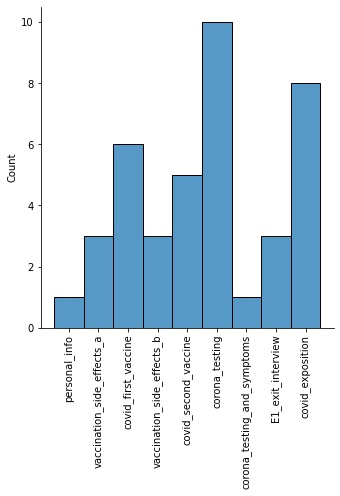

In [28]:
plt.figure(figsize = (10,8))
sns.displot(a.qs[0])
plt.xticks(rotation = 90)

In [31]:
a,b = np.unique(a.qs[0], return_counts = True)
pd.Series(b, index = a)

### Number of tests per week

In [5]:
from helper_tool import helper
h = helper(res)

In [6]:
when = h.when_tested()
when['test_date'] = pd.to_datetime(when['test_date'], errors = 'coerce').dt.date
when['week'] = when.AUTHORED.apply(lambda x: x.isocalendar()[0:2])
when = when.groupby(['week'], as_index = False).count()[['week', 'AUTHORED']]
#when = when[when.test_date >= date(2021, 11, 1)]

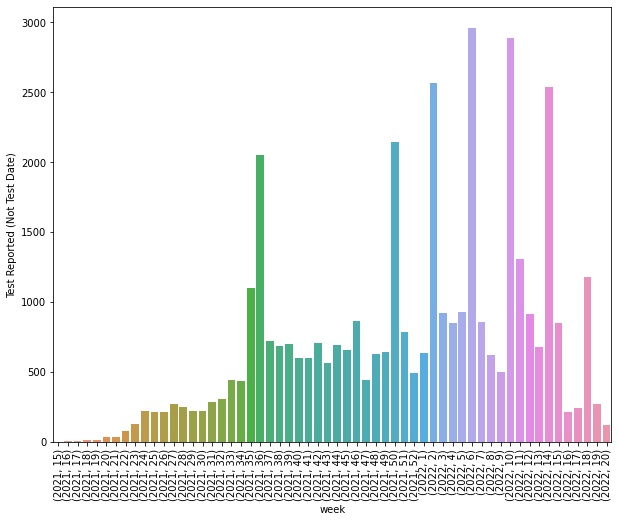

In [7]:
plt.figure(figsize = (10,8))
sns.barplot(x = when.week[20:], y = when.AUTHORED[20:])
plt.ylabel("Test Reported (Not Test Date)")
_ = plt.xticks(rotation = 90)

In [13]:
res = h.test_result()
res = res[res.AUTHORED >= date(2021, 11, 1)]
res.head()

,ALP_ID,AUTHORED,QUESTIONNAIRE,qid,covid_result
87,1496,2022-02-11,corona_testing,ebwZDAS+zkXsbUg9LHPeIWWbZdTHU/LOuq+cUsQMf3pAlI...,test_result_neg
96,1496,2022-02-11,corona_testing,IJKRDEKS6QiDATTZv41rhjO4g7gncGtpvjsfLUMEhcorkG...,test_result_neg
114,1496,2021-11-17,corona_testing,SSWfvpTx/Daw0KfES4LRdq+JBkABvwoh9oeXFDr0hLf7/g...,test_result_neg
129,1496,2022-01-06,corona_testing,LwtEOqtrFmwi72YQUPZe8fwTzfemFZXjQf0Gn01P3ExKx3...,test_result_neg
132,1496,2022-01-04,corona_testing,cij7x6jv4tXKMowPSP0hpWKbfQ4Fq8ZoWrmRzGZOBKIcqp...,test_result_neg


In [80]:
m = pd.merge(when, res, how = 'left', on = ['ALP_ID', 'AUTHORED', 'QUESTIONNAIRE'])
m[m.covid_result == 'test_result_pos']['ALP_ID'].unique().shape[0]

In [82]:
m[m.covid_result == 'test_result_pos'].drop_duplicates()

,ALP_ID,AUTHORED,QUESTIONNAIRE,test_date,covid_result
0,7184,2021-11-06,personal_info,2021-11-03,test_result_pos
1,7198,2021-11-06,personal_info,2021-11-06,test_result_pos
2,7201,2021-11-05,personal_info,2021-11-04,test_result_pos
4,7203,2021-11-07,personal_info,2021-11-03,test_result_pos
6,7210,2021-11-07,personal_info,2021-11-05,test_result_pos
...,...,...,...,...,...
6170,7897,2021-12-04,corona_testing,2021-11-01,test_result_pos
6171,7899,2021-12-04,corona_testing,2021-11-17,test_result_pos
6179,7920,2021-12-04,corona_testing,2021-11-22,test_result_pos
6182,7924,2021-12-04,corona_testing,2021-11-21,test_result_pos


### Symptoms

In [8]:
sym = h.answer("which_new_symptoms", 'number_of_symptoms')
sym['week'] = sym.AUTHORED.apply(lambda x : x.isocalendar()[0:2])

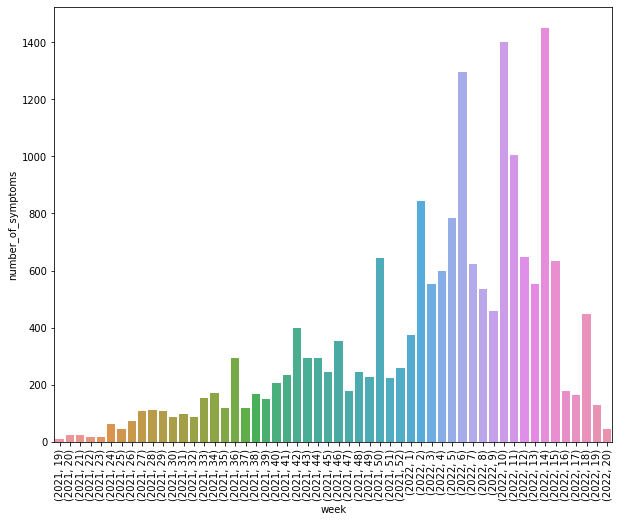

In [9]:
sym = sym.groupby('week', as_index = False).count()[['week', 'number_of_symptoms']]
plt.figure(figsize = (10,8))
sns.barplot(x = sym.week, y = sym.number_of_symptoms)
_ = plt.xticks(rotation = 90)

In [117]:
h.answer("country_of_residence", 'country')['country'].value_counts().iloc[1:].sum()

In [12]:
def inactive_people(mat, allIds):
    inactive_matrix = np.ones(shape = (53,53))*-1
    inact = np.array([-1])
    for i in range(1,53):
        week = mat[:, i]
        ii = np.isin(week, inact)
        inactive_matrix[i, i] = np.sum(ii)
        for j in range(i+1,53):
            next_week = mat[ii, j]
            inactive_matrix[i, j] = np.sum(next_week == -1)
    return inactive_matrix

In [13]:
def revival_people(mat, allIds):
    revival_matrix = np.ones(shape = (53,53))*-1
    inact = np.array([-1])
    for i in range(1,53):
        week = mat[:, i]
        ii = np.isin(week, inact)
        revival_matrix[i, i] = np.sum(ii)
        for j in range(i+1,53):
            next_week = mat[ii, j]
            revival_matrix[i, j] = np.sum(next_week == 2)
    return revival_matrix

In [14]:
jj = inactive_people(obj.mat, obj.allIds)
kk = revival_people(obj.mat, obj.allIds)

In [15]:
col_names = ['W'+str(i) for i in range(53)]
pd.DataFrame(jj, index = col_names, columns = col_names).iloc[35:,35:]

,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,W52
W35,501.0,494.0,494.0,494.0,486.0,475.0,473.0,469.0,467.0,466.0,465.0,465.0,470.0,478.0,477.0,483.0,483.0,484.0
W36,-1.0,560.0,559.0,558.0,549.0,537.0,534.0,530.0,526.0,523.0,523.0,523.0,528.0,537.0,537.0,542.0,543.0,544.0
W37,-1.0,-1.0,608.0,606.0,591.0,578.0,574.0,569.0,565.0,562.0,561.0,562.0,571.0,580.0,581.0,587.0,587.0,589.0
W38,-1.0,-1.0,-1.0,644.0,627.0,611.0,606.0,601.0,595.0,592.0,590.0,590.0,601.0,612.0,612.0,618.0,620.0,622.0
W39,-1.0,-1.0,-1.0,-1.0,699.0,680.0,675.0,666.0,657.0,654.0,652.0,652.0,651.0,662.0,662.0,670.0,674.0,675.0
W40,-1.0,-1.0,-1.0,-1.0,-1.0,858.0,844.0,830.0,809.0,804.0,800.0,800.0,799.0,796.0,805.0,812.0,828.0,831.0
W41,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1242.0,1200.0,1154.0,1143.0,1136.0,1135.0,1134.0,1130.0,1128.0,1152.0,1184.0,1190.0
W42,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1482.0,1433.0,1413.0,1401.0,1398.0,1382.0,1378.0,1376.0,1375.0,1409.0,1422.0
W43,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1759.0,1730.0,1709.0,1700.0,1676.0,1671.0,1669.0,1668.0,1664.0,1685.0
W44,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2159.0,2135.0,2118.0,2085.0,2079.0,2077.0,2076.0,2069.0,2066.0


In [38]:
kk[35:40,35:40]

array([[501.,   7.,   0.,   0.,   8.],
       [ -1., 560.,   1.,   1.,   9.],
       [ -1.,  -1., 608.,   2.,  15.],
       [ -1.,  -1.,  -1., 644.,  17.],
       [ -1.,  -1.,  -1.,  -1., 700.]])

In [39]:
res.ALP_ID.unique().shape

(6568,)

In [65]:
res[res.QUESTIONNAIRE == 'covid_exposition']

,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT,QUESTIONNAIRE_ID
10,1496,1.0.1,2021-06-30,covid_exposition,infected_person_contact,NaN,no,de,In den letzten 4 Wochen:\\n28\t\\n29\tHatten S...,G1gV+t9l8rHvVRc4vxwVc2jyRo+7t2TLiE+MUcLlo/L5aM...
11,1496,1.0.1,2021-06-30,covid_exposition,public_transport,NaN,Never,de,In den letzten 7 Tagen:\\n31\t\\n32\tWie h\'c3...,G1gV+t9l8rHvVRc4vxwVc2jyRo+7t2TLiE+MUcLlo/L5aM...
12,1496,1.0.1,2021-06-30,covid_exposition,how_many_people_in_contact,NaN,11 or more,de,In den letzten 7 Tagen:\\n34\t\\n35\tZu wie vi...,G1gV+t9l8rHvVRc4vxwVc2jyRo+7t2TLiE+MUcLlo/L5aM...
13,1496,1.0.1,2021-06-30,covid_exposition,mask_washing,NaN,times_3_to_5,de,In den letzten 7 Tagen:\\n37\t\\n38\tWie h\'c3...,G1gV+t9l8rHvVRc4vxwVc2jyRo+7t2TLiE+MUcLlo/L5aM...
20,1496,1.0.1,2021-06-30,covid_exposition,how_many_people_in_contact,NaN,11 or more,de,In den letzten 7 Tagen:\\n54\t\\n55\tZu wie vi...,Y3vnJRg07eywAcASfwZoyeZMNe/8d/uxjbFt1QEjqQ4aRi...
...,...,...,...,...,...,...,...,...,...,...
297583,8459,1.1.1,2021-12-15,covid_exposition,public_transport,NaN,Never,de,In den letzten 7 Tagen:\\n427348\t\\n427349\tW...,nzBD/3yAtbaMOYHvdlNtq7VXofVV3ZGFHfS8bz1vRVtc73...
297584,8459,1.1.1,2021-12-15,covid_exposition,infected_person_contact,NaN,no,de,In den letzten 4 Wochen:\\n427351\t\\n427352\t...,nzBD/3yAtbaMOYHvdlNtq7VXofVV3ZGFHfS8bz1vRVtc73...
297585,8459,1.1.1,2021-12-15,covid_exposition,checkin_symptoms_reported,NaN,no,de,Hatten Sie in den letzten 4 Wochen Krankheitss...,nzBD/3yAtbaMOYHvdlNtq7VXofVV3ZGFHfS8bz1vRVtc73...
297586,8459,1.1.1,2021-12-15,covid_exposition,mask_washing,NaN,times_1_to_2,de,In den letzten 7 Tagen:\\n427355\t\\n427356\tW...,nzBD/3yAtbaMOYHvdlNtq7VXofVV3ZGFHfS8bz1vRVtc73...


In [61]:
imp = h.important_dates()
#imp[imp.LAST_DONATION]

In [136]:
print("NUMBER OF PEOPLE ACTIVE IN STUDY: ",np.sum(np.isin(obj.mat[:,50], np.array([0,1,2]))))
print("NUMBEROF PEOPLE WITH 2 OR GREATER TESTS: ", np.sum(h.when_tested().groupby('ALP_ID', as_index = False).count()['test_date'] >=2))
act = a.allIds[np.isin(obj.mat[:,50], np.array([0,1,2]))]
twoTest = h.when_tested().groupby('ALP_ID', as_index = False).count()[['ALP_ID', 'test_date']]
twoTest = twoTest[twoTest.test_date>=2]['ALP_ID'].values
print("NUMBER OF PEOPLE ACTIVE AND MIN_TEST>=2 ARE:", np.intersect1d(act, twoTest).shape[0])


NUMBER OF PEOPLE ACTIVE IN STUDY:  2790
NUMBEROF PEOPLE WITH 2 OR GREATER TESTS:  2709
NUMBER OF PEOPLE ACTIVE AND MIN_TEST>=2 ARE:  1590


In [135]:
act = a.allIds[np.isin(obj.mat[:,50], np.array([0,1,2]))]
twoTest = h.when_tested().groupby('ALP_ID', as_index = False).count()[['ALP_ID', 'test_date']]
twoTest = twoTest[twoTest.test_date>=2]['ALP_ID'].values
print("NUMBER OF PEOPLE ACTIVE AND MIN_TEST>=2 ARE: ", np.intersect1d(act, twoTest).shape[0])

NUMBER OF PEOPLE ACTIVE AND MIN_TEST>=2 ARE:  1590


In [131]:
np.sum(np.isin(act, twoTest))

In [132]:
np.intersect1d(act, twoTest).shape

### IMPORTANT MEASURES

In [10]:
from important_tool import important_measures

In [11]:
i = important_measures(res, days_to_subtract = 30)

In [12]:
i.analysis()

------------------------TESTS REPORTED----------------------------

NUMBER OF TESTS REPORTED IN LAST 30 DAYS:  1845
NUMBER OF UNIQUE PEOPLE REPORTING TESTS IN LAST 30 DAYS:  608
NUMBER OF PEOPLE REPORTING MORE THAN 1 TESTS IN LAST 30 DAYS:  306

number of instances a person said yes in a disclaimer on a specific date 594
number of times he/she goes on to report the test: 458 ----percentage: 77.10437710437711

------------------------TESTS RESULTS----------------------------

NUMBER OF TEST_RESULTS IN LAST 30 DAYS:  1873
NUMBER OF UNIQUE PEOPLE REPORTING TEST_RESULTS IN LAST 30 DAYS:  608
NUMBER OF POSITIVE TESTS IN LAST 30 DAYS:  275
NUMBER OF NEGATIVE TESTS IN LAST 30 DAYS:  1598
NUMBER OF UNIQUE PEOPLE REPORTING POSITIVE TESTS IN LAST 30 DAYS:  132
NUMBER OF UNIQUE PEOPLE REPORTING NEGATIVE TESTS IN LAST 30 DAYS:  530

------------------------SYMPTOMS TRACKING----------------------------

NUMBER OF UNIQUE INSTANCE WHERE A PERSON SAID YES IN EXPOSITION ON A SPECIFIC DATE 30 DAYS:  184

### booster

In [13]:
from helper_tool import helper
h = helper(res)

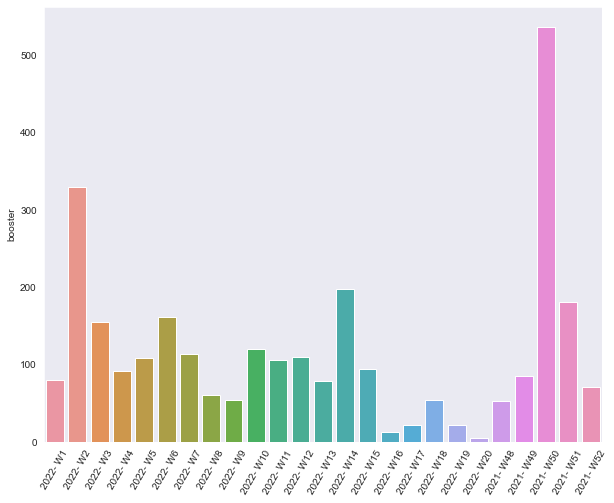

In [14]:
booster = h.response('when_vaccinated_booster', 'covid_booster_vaccine', 'booster')
booster['week'] = booster.AUTHORED.apply(lambda x: x.isocalendar()[1])
booster['year'] = booster.AUTHORED.apply(lambda x: x.isocalendar()[0])
booster = booster.groupby(['week', 'year'], as_index= False).count()[['week', 'year', 'booster']]


plt.figure(figsize = (10,8))
sns.set_style("dark")
sns.barplot(x = booster["year"].astype(str) + "- W"+ booster["week"].astype(str), y = booster.booster)
_ =  plt.xticks(rotation = 60)

Text(0, 0.5, 'Number of people who got respective vaccines')

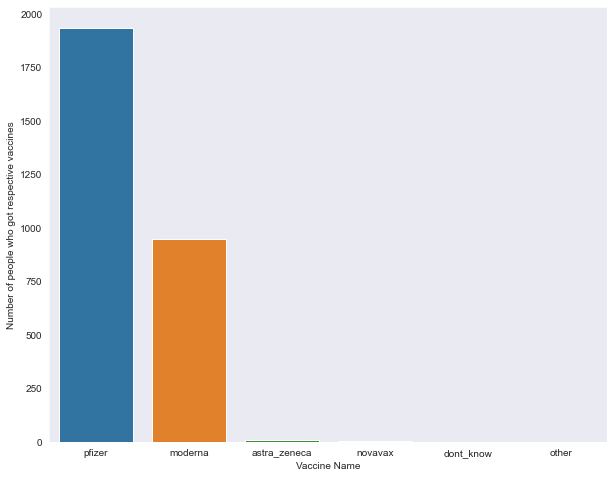

In [15]:
which_booster = h.response('which_vaccine_received', 'covid_booster_vaccine', 'booster').booster.value_counts()
plt.figure(figsize = (10,8))
sns.set_style("dark")
sns.barplot(x = which_booster.index, y = which_booster.values)
plt.xlabel("Vaccine Name")
plt.ylabel("Number of people who got respective vaccines")

## Vaccine Status at positive test time

In [29]:
from helper_tool import helper
h = helper(res)

In [36]:
pos = h.merged()
pos = pos[pos['covid_result'] == 'test_result_pos']
vac = h.vac_merger()
vac.columns = ['ALP_ID', 'AUTHORED_vac1', 'QUESTIONNAIRE_vac1', 'qid_vac1', 'VAC1', 'VAC1TIME',
       'AUTHORED_vac2', 'QUESTIONNAIRE_vac2', 'qid_vac2', 'VAC2', 'VAC2TIME',
       'AUTHORED_booster', 'QUESTIONNAIRE_booster', 'qid_booster', 'BOOSTER_TIME']
df = pd.merge(pos, vac, how = 'left', on = ['ALP_ID'])
min_dates = h.when_tested()[['ALP_ID', 'AUTHORED']].groupby(['ALP_ID'], as_index = False).min()
min_dates.columns = ['ALP_ID', 'first_test_date']
df = pd.merge(df, min_dates, how = 'left', on = ['ALP_ID'])
df['test_date'] = pd.to_datetime(df.test_date).dt.date

In [37]:
def get_status(row):
        if 0 <((row['test_date'] - row['first_test_date']).days) <=180:
            return "infected"
        
        ## Booster
        
        elif pd.notna(row['BOOSTER_TIME']):
            if 0 < (row['test_date'] - row['BOOSTER_TIME']).days <= 180:
                return "fully_vaccinated"
            else:
                return "partially_vaccinated"
        
        elif pd.isna(row['VAC1']) :
            return "unvaccinated"
        elif (row['VAC1'] == 'johnson') & (14<=(row['test_date'] - row['VAC1TIME']).days <=180):
            return "fully_vaccinated"
        elif (row['VAC1'] == 'johnson') & ((row['test_date'] - row['VAC1TIME']).days <14 | (row['test_date'] - row['VAC1TIME']).days >180):
            return "partially_vaccinated"
        elif (row['VAC1'] == 'johnson') & ((row['test_date'] - row['VAC1TIME']).days <0):
            return "unvaccinated"
    
    ## SECOND VACCINE
        elif pd.notna(row['VAC2TIME']):
            if 14<=(row['test_date'] - row['VAC2TIME']).days <=180:
                return "fully_vaccinated"
            elif (row['test_date'] - row['VAC1TIME']).days <0:
                return "unvaccinated"
            else:
                return "partially_vaccinated"
        
    
        ## ONLY ONE VACCINE
        elif (row['VAC1'] != 'johnson') & (pd.isna(row['VAC2'])) & (0<=(row['test_date'] - row['VAC1TIME']).days <180):
            return 'partially_vaccinated'

        elif (row['VAC1'] != 'johnson') & (pd.isna(row['VAC2'])) & ((row['test_date'] - row['VAC1TIME']).days <0):
            return 'unvaccinated'




In [38]:
df['status'] = df.apply(get_status, axis = 1)

<AxesSubplot:>

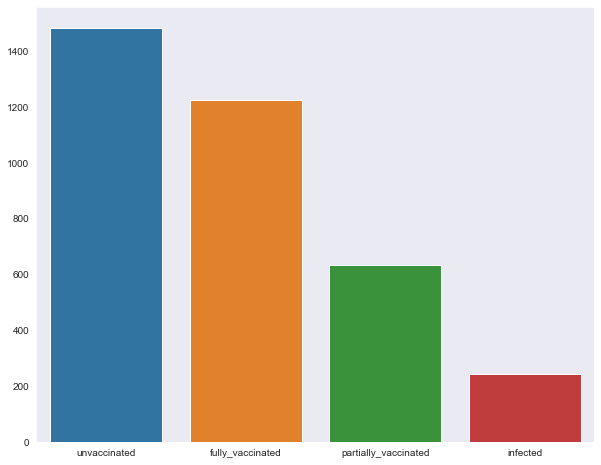

In [39]:
ii = df.status.value_counts()
plt.figure(figsize = (10,8))
sns.barplot(x = ii.index, y = ii.values)

## Engagement from months

In [22]:
p = par.ALP_ID.unique()
r = res.ALP_ID.unique()
ii = np.isin(p, r)
ii = np.invert(ii)
ii = p[ii]

In [23]:
par[par.ALP_ID.isin(ii)]

,ALP_ID,EXTERNAL_ID,STATUS,START_DATE,END_DATE
104,4597,anonymous,enrolled,2021-08-18 00:00:00,NaN
161,4528,anonymous,withdrawn,2021-08-16 10:11:58,2021-08-16 10:16:36
384,4270,anonymous,enrolled,2021-08-21 00:00:00,NaN
404,4008,anonymous,enrolled,2021-08-20 00:00:00,NaN
427,9000,anonymous,withdrawn,2022-01-05 21:21:22,2022-01-05 21:25:12
...,...,...,...,...,...
8296,10762,anonymous,enrolled,2022-02-10 00:00:00,NaN
8301,4036,anonymous,withdrawn,2021-08-19 09:51:14,2022-02-10 05:23:16
8311,10755,anonymous,enrolled,2022-02-10 00:00:00,NaN
8336,10801,anonymous,withdrawn,2022-02-11 09:22:09,2022-02-11 09:26:33


In [37]:
def engagements(mat, weeks_before = 12):
    part_of_study = mat[:, -1*weeks_before]!=-2
    mat = mat[part_of_study, :]
    print("number of participants(who submitted anything) and part of study", weeks_before,   "weeks before:",mat.shape[0])
    mat = mat[:, -1*weeks_before:]
    which_went_inactive = np.where(mat == -1)[0]
    ii = np.invert(np.isin(np.arange(mat.shape[0]), which_went_inactive))
    remained_active = mat[ii,:]
    print("users who stayed active through out this time",remained_active.shape[0])
    print("percentage:",(remained_active.shape[0]/mat.shape[0])*100,"%")
    

In [38]:
engagements(obj.mat, weeks_before = 16)

number of participants(who submitted anything) and part of study 16 weeks before: 6127
users who stayed active through out this time 832
percentage: 13.579239432022197 %


In [ ]:
a = np.array([1,0,0,0,0,0,0,0, 1, 1, 1, 2, 0])
np.where(a == -1)

(array([], dtype=int64),)

In [39]:
def inactive_time(mat):
    j,k = np.where(mat==1)
    d = pd.DataFrame({'row':j, 'week_wrote_first':k})
    d = d.groupby(['row'], as_index = False).min()
    j = d.row.to_list()
    k = d.week_wrote_first.to_list()
    when_went_inactive = []
    not_yet_inactive = []
    for row, join in zip(j,k):
        inactive_idx = np.where(mat[row, join:] == -1)[0]
        if inactive_idx.shape[0] == 0:
            not_yet_inactive.append(1)
            when_went_inactive.append(-1)
        else:
            when_went_inactive.append(inactive_idx[0])
            not_yet_inactive.append(-1)
    d['when_went_inactive'] = when_went_inactive
    d['not_yet_inactive'] = not_yet_inactive
    return d

In [40]:
activity = inactive_time(obj.mat)

In [41]:
activity.head()

,row,week_wrote_first,when_went_inactive,not_yet_inactive
0,0,21,-1,1
1,1,20,23,-1
2,2,27,-1,1
3,3,9,8,-1
4,4,27,-1,1


In [42]:
inactive = activity[activity['when_went_inactive']!=-1]
inactive = inactive.when_went_inactive.value_counts()

Text(0, 0.5, 'Number of users')

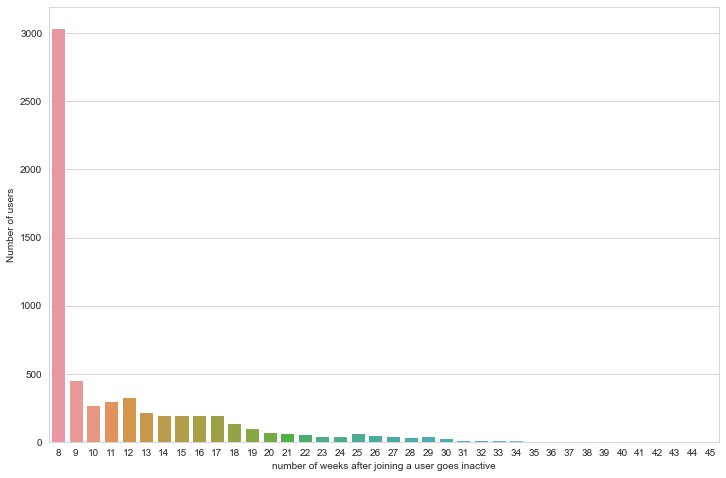

In [43]:
plt.figure(figsize = (12,8))
sns.barplot(x = inactive.index, y = inactive.values)
plt.xlabel("number of weeks after joining a user goes inactive")
plt.ylabel("Number of users")

In [44]:
inactive = activity[activity['when_went_inactive']==8]
inactive = inactive.week_wrote_first.value_counts()

Text(0, 0.5, 'Number of users')

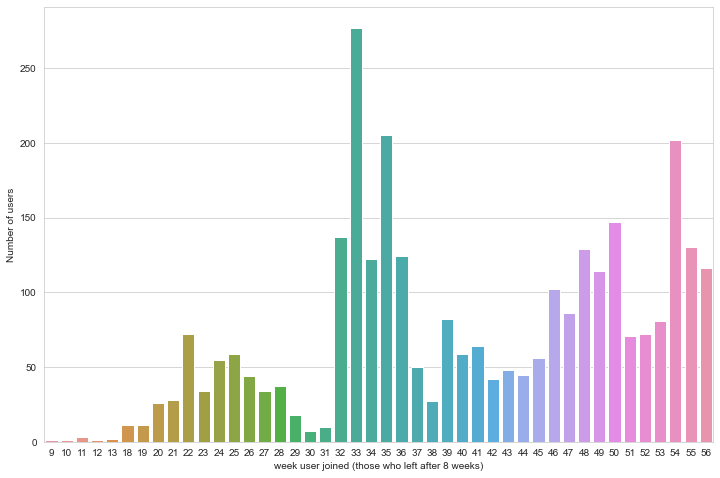

In [45]:
plt.figure(figsize = (12,8))
sns.barplot(x = inactive.index, y = inactive.values)
plt.xlabel("week user joined (those who left after 8 weeks)")
plt.ylabel("Number of users")

#### Challenges

In [164]:
challenge_ids = res[res.AUTHORED>= date(2021, 11, 9)].ALP_ID.unique()
print("number of users after gamification went active:",challenge_ids.shape[0])

number of users after gamification went active: 3805


In [5]:
total_activated = 986
c1 = 924
c2 = 262
c3 = 118
c4 = 50

In [168]:
user_challenges = res[res.ALP_ID.isin(challenge_ids)]

In [185]:
pd.options.mode.chained_assignment = None 

user_challenges_before = user_challenges[user_challenges.AUTHORED< date(2021, 11, 9)]
user_challenges_after = user_challenges[user_challenges.AUTHORED>= date(2021, 11, 9)]
user_challenges_before['exposition'] = user_challenges_before.QUESTIONNAIRE == 'covid_exposition'
user_challenges_after['exposition'] = user_challenges_after.QUESTIONNAIRE == 'covid_exposition'

In [186]:
series_before_date = user_challenges_before[['ALP_ID','AUTHORED', 'exposition']].groupby(['ALP_ID','AUTHORED'], as_index = False).sum()
series_after_date = user_challenges_after[['ALP_ID','AUTHORED', 'exposition']].groupby(['ALP_ID','AUTHORED'], as_index = False).sum()

In [187]:
series_after_date.loc[series_after_date.exposition!=0, 'exposition'] = 1
series_before_date.loc[series_before_date.exposition!=0,'exposition'] = 1
series_before = series_before_date[['ALP_ID','exposition']].groupby(['ALP_ID'], as_index = False).sum()
series_after = series_after_date[['ALP_ID','exposition']].groupby(['ALP_ID'], as_index = False).sum()

In [181]:
a = series_after.ALP_ID.values
b = series_before.ALP_ID.values

In [189]:
series_after.columns = ['ALP_ID', 'exposition_after']
series_before.columns = ['ALP_ID', 'exposition_before']
challenge = pd.merge(series_after, series_before, how = 'left', on= ['ALP_ID'])

In [201]:
challenge[(challenge.exposition_before>=0) & (challenge.exposition_before<2)]

,ALP_ID,exposition_after,exposition_before
6,1512,3,1.0
25,1559,1,0.0
46,1634,3,1.0
55,1658,0,1.0
67,1698,0,0.0
...,...,...,...
1484,7255,1,0.0
1485,7256,0,0.0
1486,7257,2,0.0
1518,7315,1,0.0


Text(0.5, 1.0, 'People who joined near to gamification going live, how do they behave')

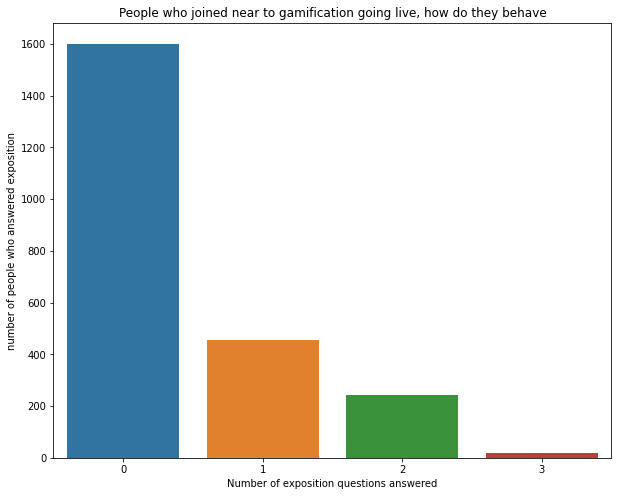

In [206]:
ii = challenge[pd.isnull(challenge.exposition_before)].exposition_after.value_counts()
plt.figure(figsize = (10,8))
sns.barplot(x = ii.index, y = ii.values)
plt.xlabel("Number of exposition questions answered")
plt.ylabel("number of people who answered exposition")
plt.title("People who joined near to gamification going live, how do they behave")

In [207]:
ii

0    1601
1     456
2     241
3      18
Name: exposition_after, dtype: int64

In [111]:
print("user who fill at least 1 questionnaire after (9.11.2021) --->", challenge.shape[0])
print("user who haven't filled any questionnaire before (9.11.21) but fill after that", challenge[pd.isnull(challenge.exposition_before)].shape[0])
print("people filled before and after", challenge[~pd.isnull(challenge.exposition_before)].shape[0])
print("havent filled before (9.11.21) but fills atleast 2 questionnaire after", challenge[(pd.isnull(challenge.exposition_before)) & (challenge.exposition_after>1)].shape[0])


user who fill at least 1 questionnaire after (9.11.2021) ---> 2093
user who haven't filled any questionnaire before (9.11.21) but fill after that 856
people filled before and after 1237
havent filled before (9.11.21) but fills atleast 2 questionnaire after 324


#### Categorize Users

In [14]:
w = obj.mat[:, -1]
last_two_weeks = np.sum(np.isin(obj.mat[:, -2:], np.array([-1])), axis = 1) == 2
print("number of users part of study", np.sum(np.isin(w, np.array([0,1,2]))))
print("number of users inactive", np.sum(np.isin(w, np.array([-1]))))
print()
print("-------- dividing inactive users--------------")
print()
print("inactive since last 9 weeks:",np.sum(last_two_weeks))
print("inactive less than 9 weeks", np.sum((obj.mat[:, -2] != -1) & (obj.mat[:, -1]==-1)))
print("-----------------------------------")
print("suspended",par[par.STATUS == 'suspended'].shape[0])
print("withdrawn",par[par.STATUS == 'withdrawn'].shape[0])


number of users part of study 3278
number of users inactive 4547

-------- dividing inactive users--------------

inactive since last 9 weeks: 4422
inactive less than 9 weeks 125
-----------------------------------
suspended 268
withdrawn 188


Text(0.5, 0, 'weeks')

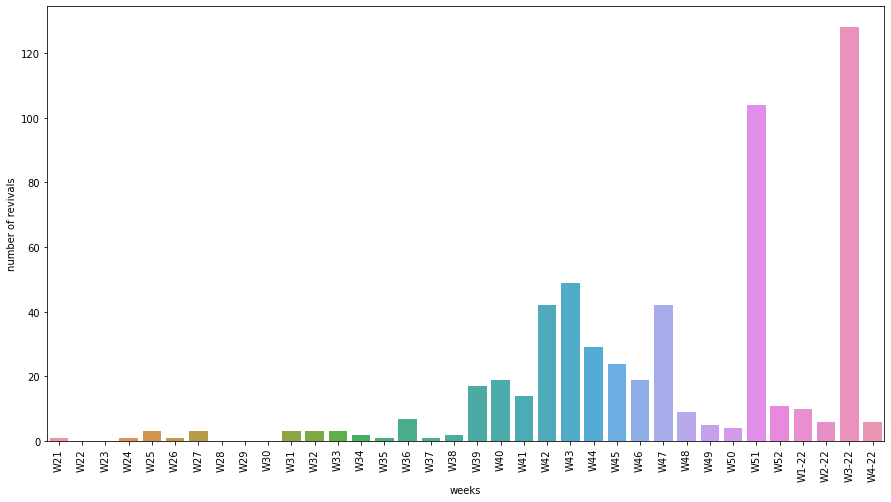

In [142]:
r = np.sum(obj.mat == 2, axis = 0)[1:]
week_name = ['W'+str(i+1) if i+1<53 else 'W'+str(i+1-52)+'-22' for i in range(len(r))]
plt.figure(figsize = (15,8))
sns.barplot(x = week_name[20:], y = r[20:])
_ = plt.xticks(rotation = 90)
plt.ylabel("number of revivals")
plt.xlabel("weeks")

In [146]:
pd.Series(r, index = week_name)[30:]

W31        3
W32        3
W33        3
W34        2
W35        1
W36        7
W37        1
W38        2
W39       17
W40       19
W41       14
W42       42
W43       49
W44       29
W45       24
W46       19
W47       42
W48        9
W49        5
W50        4
W51      104
W52       11
W1-22     10
W2-22      6
W3-22    128
W4-22      6
dtype: int64

In [141]:
len(r)

57

In [210]:
sus = par[par.STATUS == 'suspended'].ALP_ID.values

In [238]:
active_alp = obj.allIds[np.isin(w, np.array([0,1,2]))]
inactive_alp = obj.allIds[np.isin(w, np.array([-1]))]

In [240]:
print("active excluding suspended",active_alp.shape[0] - np.sum(np.isin(active_alp,sus)))
print("inactive excluding suspended",inactive_alp.shape[0] - np.sum(np.isin(inactive_alp,sus)))

active excluding suspended 3124
inactive excluding suspended 4218


In [241]:
inactive_alp_excluding = inactive_alp[np.invert(np.isin(inactive_alp, sus))]

In [244]:
ii = np.isin(obj.allIds, inactive_alp_excluding)
inactive_mat = obj.mat[ii, :]

In [246]:
last_two_weeks = np.sum(np.isin(inactive_mat[:, -2:], np.array([-1])), axis = 1) == 2

In [248]:
np.sum(~last_two_weeks)

162

## Revived participants

In [41]:
obj.mat.shape

(8239, 60)

/var/folders/t6/1krtm78n7sg32l4dh77g43nm0000gn/T/ipykernel_79171/3830387740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start59['week'] = start59.START_DATE.apply(lambda x: x.isocalendar()[:2])


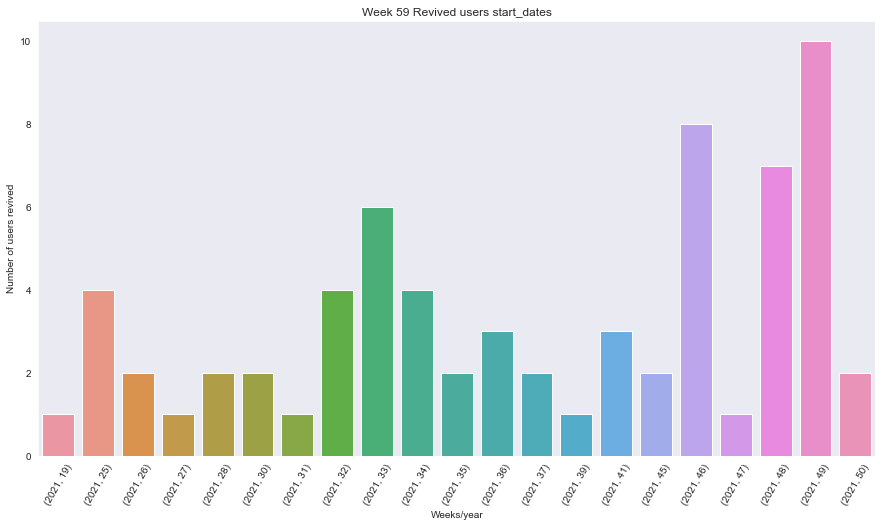

In [42]:
rev59 = obj.allIds[obj.mat[:,-1]==2]
imp = h.important_dates()
start59 = imp[imp.ALP_ID.isin(rev59)]
start59['week'] = start59.START_DATE.apply(lambda x: x.isocalendar()[:2])
start59 = start59[['week', 'ALP_ID']].groupby(['week'], as_index = False).count()
plt.figure(figsize = (15,8))
sns.barplot(x = start59.week, y = start59.ALP_ID)
plt.xticks(rotation = 60)
plt.xlabel("Weeks/year")
_ = plt.ylabel("Number of users revived")
_ = plt.title("Week 59 Revived users start_dates")

In [23]:
ii55 = obj.mat[:,55]==2
rev55 = obj.allIds[ii55]
imp = h.important_dates()

In [33]:
start55 = imp[imp.ALP_ID.isin(rev55)]
start55['week'] = start55.START_DATE.apply(lambda x: x.isocalendar()[:2])
start55 = start55[['week', 'ALP_ID']].groupby(['week'], as_index = False).count()

/var/folders/t6/1krtm78n7sg32l4dh77g43nm0000gn/T/ipykernel_64871/891441099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start55['week'] = start55.START_DATE.apply(lambda x: x.isocalendar()[:2])


In [37]:
ii51 = obj.mat[:,51]==2
rev51 = obj.allIds[ii51]

In [38]:
start51 = imp[imp.ALP_ID.isin(rev51)]
start51['week'] = start51.START_DATE.apply(lambda x: x.isocalendar()[:2])
start51 = start51[['week', 'ALP_ID']].groupby(['week'], as_index = False).count()

/var/folders/t6/1krtm78n7sg32l4dh77g43nm0000gn/T/ipykernel_64871/1877787381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start51['week'] = start51.START_DATE.apply(lambda x: x.isocalendar()[:2])


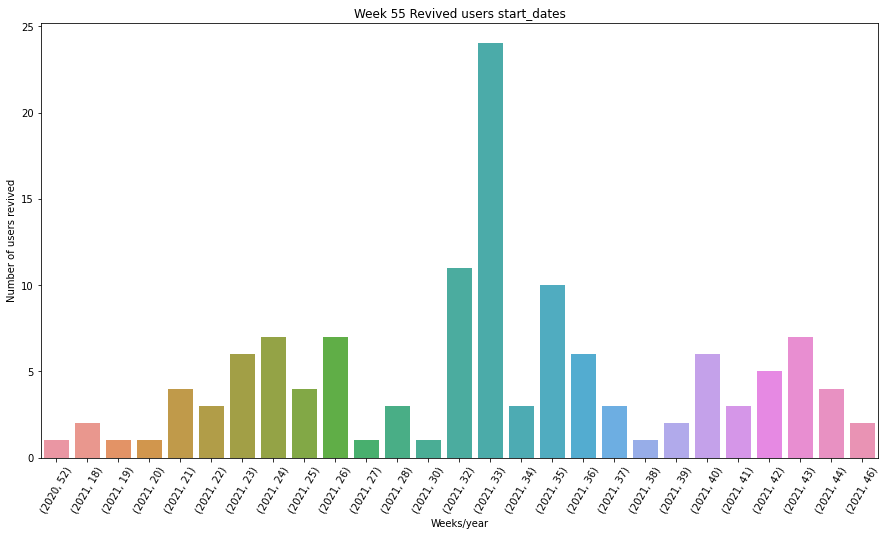

In [49]:
plt.figure(figsize = (15,8))
sns.barplot(x = start55.week, y = start55.ALP_ID)
plt.xticks(rotation = 60)
plt.xlabel("Weeks/year")
_ = plt.ylabel("Number of users revived")
_ = plt.title("Week 55 Revived users start_dates")

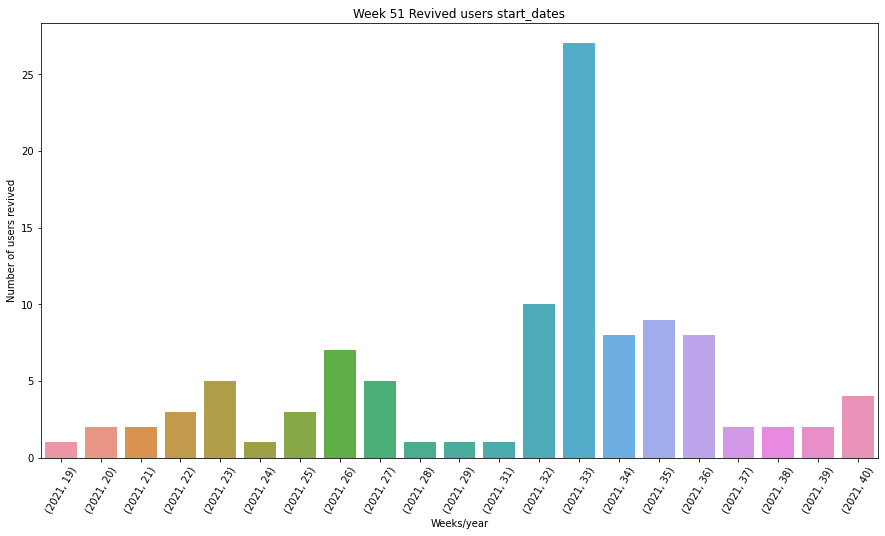

In [50]:
plt.figure(figsize = (15,8))
sns.barplot(x = start51.week, y = start51.ALP_ID)
plt.xticks(rotation = 60)
plt.xlabel("Weeks/year")
_ = plt.ylabel("Number of users revived")
_ = plt.title("Week 51 Revived users start_dates")

In [52]:
res55 = res[res.ALP_ID.isin(rev55)]
res51 = res[res.ALP_ID.isin(rev51)]

In [60]:
res51[(res51.AUTHORED>=date(2021, 12, 22)) & (res51.AUTHORED<=date(2021, 12, 26))].ALP_ID.unique().shape

(97,)

In [61]:
res51[(res51.AUTHORED>=date(2021, 12, 20)) & (res51.AUTHORED<date(2021, 12, 22))].ALP_ID.unique().shape

(7,)

In [63]:
res51[(res51.AUTHORED==date(2021, 12, 22))].ALP_ID.unique().shape

(78,)

In [64]:
rev51.shape

(104,)

In [66]:
sd = res[res.LINK_ID == 'study_discovery']
sd51 = sd[sd.ALP_ID.isin(rev51)]
sd55 = sd[sd.ALP_ID.isin(rev55)]

In [67]:
sd55.ALP_ID.unique().shape

(92,)

In [68]:
sd51.ALP_ID.unique().shape

(78,)

In [71]:
sd55.VALUECODING_CODE.value_counts()

public_event      54
facebook_ad       13
google_search     10
other_source       8
facebook_group     3
poster             2
friends_family     2
Name: VALUECODING_CODE, dtype: int64

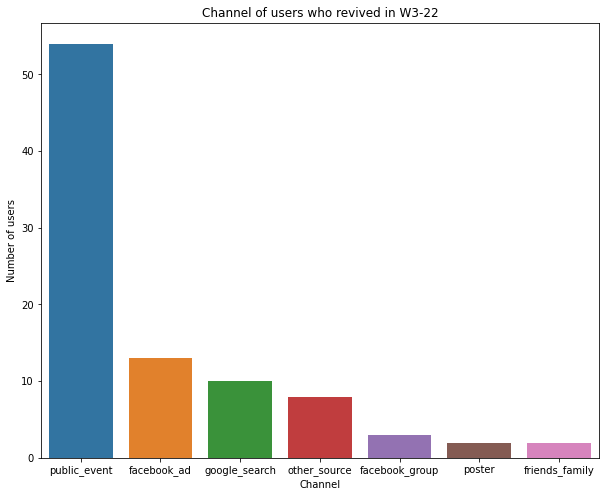

In [75]:
plt.figure(figsize = (10,8))
sns.barplot(x = sd55.VALUECODING_CODE.value_counts().index, y = sd55.VALUECODING_CODE.value_counts())
plt.xlabel("Channel")
plt.ylabel("Number of users")
_ = plt.title("Channel of users who revived in W3-22")

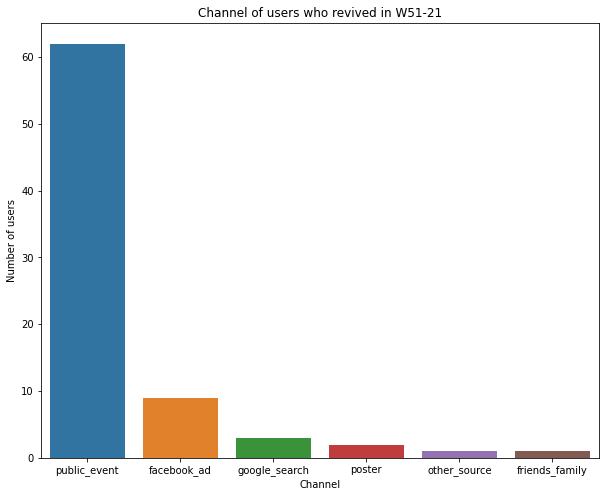

In [76]:
plt.figure(figsize = (10,8))
sns.barplot(x = sd51.VALUECODING_CODE.value_counts().index, y = sd51.VALUECODING_CODE.value_counts())
plt.xlabel("Channel")
plt.ylabel("Number of users")
_ = plt.title("Channel of users who revived in W51-21")

In [101]:
test = h.when_tested()

In [104]:
sd = h.answer("study_discovery",'channel')[['ALP_ID', 'channel']]
sd = pd.Series(sd.channel.values, index = sd.ALP_ID).to_dict()

In [106]:
test['sd'] = test['ALP_ID'].map(sd)

In [148]:
num_test = test.sd.value_counts()
num_test = num_test.to_frame().reset_index()
num_test.columns = ['sd', 'num_test']

In [153]:
num_people = test[['ALP_ID', 'sd']].groupby(['sd'], as_index = False).nunique()
num_people.columns = ['sd', 'num_people']

In [155]:
m = pd.merge(num_test, num_people, on = ['sd'], how = 'left')
m['avg'] = m['num_test']/m['num_people']
m

,sd,num_test,num_people
0,public_event,8410,1940
1,google_search,3156,703
2,other_source,2610,607
3,facebook_ad,2550,603
4,friends_family,1184,214
5,poster,361,34
6,facebook_group,292,120
7,general_poster,80,17


In [163]:
imp = h.important_dates()
imp['sd'] = imp['ALP_ID'].map(sd)

In [164]:
imp

,ALP_ID,START_DATE,active_days,LAST_DONATION,sd
0,1496,2021-05-27,224,2022-01-06,NaN
1,1497,2021-05-18,169,2021-11-03,NaN
2,1498,2021-07-05,194,2022-01-15,facebook_ad
3,1499,2021-03-04,116,2021-06-28,NaN
4,1500,2021-07-10,186,2022-01-12,poster
...,...,...,...,...,...
7820,10598,2022-02-05,0,2022-02-05,other_source
7821,10601,2022-02-05,0,2022-02-05,google_search
7822,10602,2022-02-05,0,2022-02-05,google_search
7823,10607,2022-02-05,0,2022-02-05,facebook_ad


In [169]:
imp[['sd', 'active_days']].groupby(['sd'], as_index = False).mean()

,sd,active_days
0,facebook_ad,22.343486
1,facebook_group,14.163399
2,friends_family,27.370370
3,general_poster,4.542857
4,google_search,17.256608
5,other_source,18.390126
6,poster,65.333333
7,public_event,45.071730


## Unvaccinated

In [95]:
vac = h.vac_merger()
vac.head()

,ALP_ID,AUTHORED_x,QUESTIONNAIRE_x,qid_x,VAC1,VAC1TIME,AUTHORED_y,QUESTIONNAIRE_y,qid_y,VAC2,VAC2TIME,AUTHORED,QUESTIONNAIRE,qid,BOOSTER_TIME
0,1496,2021-05-30,covid_first_vaccine,U3JFx1puJKwle8bwjiKB5F6IwwkLqTlCo4z5Pji5vci661...,moderna,2021-05-30,NaN,NaN,NaN,NaN,NaN,2021-12-21,covid_booster_vaccine,kI3Jecev1wBvjluR6L3YFQI6Gjh57JSdGxov7uxU3FlDcp...,2021-11-24
1,1497,2021-05-18,covid_first_vaccine,btG0zmb/CL264m1Wu3mpYh4aASq8M+ZDJjmXFbSyengUi1...,astra_zeneca,2021-05-12,2021-07-14,covid_second_vaccine,nKM6/iV34MbTFHLghQinn2+hDteqj+5eF/1hO/A8oxXHDv...,astra_zeneca,2021-06-30,NaN,NaN,NaN,NaN
2,1498,2021-07-09,covid_first_vaccine,BtNr5wfB9i5gWtqcQNrvpA/ufjSXDeNZZmmPDcUgFqCyTx...,pfizer,2021-06-18,2021-08-04,covid_second_vaccine,uzQJJubPkX5l7AjEdVGR6MOXjAsPV7O8IUrzq8e+OBTYTP...,pfizer,2021-07-30,2021-12-15,covid_booster_vaccine,Ks2BHVdSYxdNGIDmTSQr8/k1U8rObyzZ6Dc2+FBUgKFNgx...,2021-12-13
3,1499,2021-06-28,covid_first_vaccine,TkGumuteSpV88UjbmoiQvsD5I6BJwuR46RcD2nGUCusr7w...,pfizer,2021-01-18,2021-06-28,covid_second_vaccine,Q/kiQP3tcEujZqiOKBTzm6OS59EpAXC65WAtx3dZz5Ynwc...,pfizer,2021-02-15,NaN,NaN,NaN,NaN
4,1499,2021-06-28,covid_first_vaccine,TkGumuteSpV88UjbmoiQvsD5I6BJwuR46RcD2nGUCusr7w...,pfizer,2021-01-18,2021-06-28,covid_second_vaccine,qf3T+8xdNI9qxegGVFxkVbT3ZhuMrJUidIALajU2W05ula...,pfizer,2021-02-15,NaN,NaN,NaN,NaN


In [96]:
vac1 = h.response('which_vaccine_received', 'covid_first_vaccine','vac').ALP_ID.unique()

In [97]:
withdrawn = par[par.STATUS == 'withdrawn'].ALP_ID.unique()
suspended = par[par.STATUS == 'suspended'].ALP_ID.unique()
allAlp = par.ALP_ID.unique()

In [98]:
novac1 = allAlp[np.invert(np.isin(allAlp, vac1))]

In [16]:
ii = np.isin(obj.allIds, novac1)

In [17]:
novac1mat = obj.mat[ii, :]

In [18]:
np.sum((novac1mat[:,-1] == 1) & (novac1mat[:,-2] == -2))

56

In [30]:
np.sum((novac1mat[:,-1] == -1))

708

In [99]:
m = h.merged()
m = m[m.ALP_ID.isin(novac1)]

In [100]:
print("number of tests", m.shape[0])
print("positive test",m[m.covid_result == 'test_result_pos'].shape[0]) 

number of tests 6368
positive test 1458


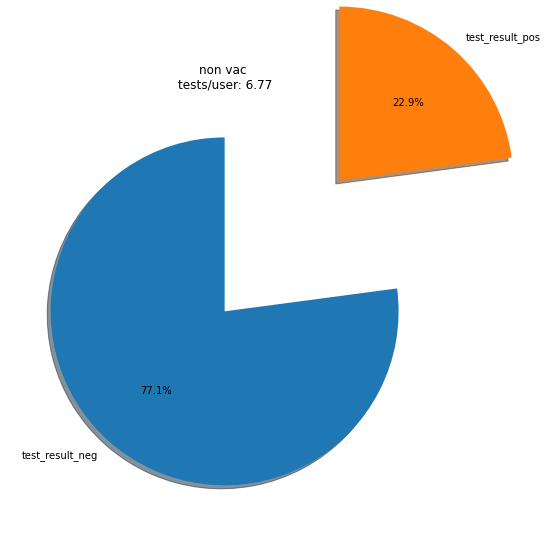

In [108]:
not_vaccinated = m.covid_result.value_counts()
not_test_per_user = m.shape[0]/m.ALP_ID.unique().shape[0]
plt.figure(figsize = (10,8))
_ = plt.pie(not_vaccinated.values, explode=[0,1], labels=not_vaccinated.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
_ = plt.title("non vac \n"+ "tests/user: "+ str(np.round(not_test_per_user,2)))

In [48]:
second = h.response("which_vaccine_received","covid_second_vaccine", 'second')
johson_users = h.response('which_vaccine_received', 'covid_first_vaccine','first')
johson_users = johson_users[johson_users['first'] == 'johnson']
second = pd.concat([second,johson_users ])
secondid = second.ALP_ID.unique()
second.columns = ['ALP_ID', 'AUTHORED', 'QUESTIONNAIRE', 'qid', 'VAC2', 'VAC1']
m = pd.merge(second, h.vac1[['ALP_ID', 'VAC1', 'VAC1TIME']], how = 'left', on = ['ALP_ID', 'VAC1'])
m = pd.merge(m, h.vac2[['ALP_ID', 'VAC2', 'VAC2TIME']], how = 'left', on = ['ALP_ID', 'VAC2'])
m['vactime'] = m.apply(lambda x: x['VAC2TIME'] if pd.isnull(x['VAC1TIME']) else  x['VAC1TIME'], axis = 1)

In [49]:
johson_users = h.response('which_vaccine_received', 'covid_first_vaccine','first')
johson_users = johson_users[johson_users['first'] == 'johnson']

In [50]:
second = pd.concat([second,johson_users ])
secondid = second.ALP_ID.unique()

In [62]:
second.columns = ['ALP_ID', 'AUTHORED', 'QUESTIONNAIRE', 'qid', 'VAC2', 'VAC1']

In [66]:
m = pd.merge(second, h.vac1[['ALP_ID', 'VAC1', 'VAC1TIME']], how = 'left', on = ['ALP_ID', 'VAC1'])
m = pd.merge(m, h.vac2[['ALP_ID', 'VAC2', 'VAC2TIME']], how = 'left', on = ['ALP_ID', 'VAC2'])

In [72]:
m['vactime'] = m.apply(lambda x: x['VAC2TIME'] if pd.isnull(x['VAC1TIME']) else  x['VAC1TIME'], axis = 1)

In [73]:
m

,ALP_ID,AUTHORED,QUESTIONNAIRE,qid,VAC2,VAC1,VAC1TIME,VAC2TIME,vactime
0,1497,2021-07-14,covid_second_vaccine,nKM6/iV34MbTFHLghQinn2+hDteqj+5eF/1hO/A8oxXHDv...,astra_zeneca,NaN,NaN,2021-06-30,2021-06-30
1,1498,2021-08-04,covid_second_vaccine,uzQJJubPkX5l7AjEdVGR6MOXjAsPV7O8IUrzq8e+OBTYTP...,pfizer,NaN,NaN,2021-07-30,2021-07-30
2,1499,2021-06-28,covid_second_vaccine,Q/kiQP3tcEujZqiOKBTzm6OS59EpAXC65WAtx3dZz5Ynwc...,pfizer,NaN,NaN,2021-02-15,2021-02-15
3,1499,2021-06-28,covid_second_vaccine,Q/kiQP3tcEujZqiOKBTzm6OS59EpAXC65WAtx3dZz5Ynwc...,pfizer,NaN,NaN,2021-02-15,2021-02-15
4,1499,2021-06-28,covid_second_vaccine,qf3T+8xdNI9qxegGVFxkVbT3ZhuMrJUidIALajU2W05ula...,pfizer,NaN,NaN,2021-02-15,2021-02-15
...,...,...,...,...,...,...,...,...,...
5248,11061,2022-02-13,covid_first_vaccine,fhSvxKnnAgrHuajhV+BkdvToJ7q7Jpl05BltBCgPTBJXoT...,NaN,johnson,2021-06-08,NaN,2021-06-08
5249,11103,2022-02-14,covid_first_vaccine,NZRC5PJgJ8GVJmXe4JOYDRCJHpDEoo05i4zT4/VxH+da4/...,NaN,johnson,2021-11-23,NaN,2021-11-23
5250,11116,2022-02-15,covid_first_vaccine,RPQtkjMNaO21zaCC5jbDsdx+iKZPRNzg/96C9aq6rMaJcW...,NaN,johnson,2020-07-08,NaN,2020-07-08
5251,11121,2022-02-15,covid_first_vaccine,jn+8EdylO2tWjM0rs8Bs4H+N1oDiJUuiF9X7dDpAbfyNZ+...,NaN,johnson,2021-06-14,NaN,2021-06-14


In [79]:
test_results = h.merged()
test_results = pd.merge(test_results, m[['ALP_ID', 'vactime']], how = 'inner', on = ['ALP_ID'])

In [85]:
test_results['test_date'] = test_results.test_date.apply(lambda x: pd.to_datetime(x).date())

In [87]:
test_results = test_results[test_results['test_date']> test_results['vactime']]

In [88]:
test_results

,ALP_ID,AUTHORED,QUESTIONNAIRE,qid,test_date,how_detected,covid_result,START_DATE,active_days,LAST_DONATION,vactime
1,1512,2022-01-16,corona_testing,EGIzuNfmlkE7FhUTlv1GDVUsZb3Uo2wRdRF/HTr7krVb+F...,2022-01-14,antigen_test,test_result_neg,2021-09-21,117,2022-01-16,2021-03-19
2,1512,2022-01-16,corona_testing,hG1dKPUmmItSV390PK0T5JnQdK3ibRce7xly4OxeP0FA0V...,2021-12-23,antigen_test,test_result_neg,2021-09-21,117,2022-01-16,2021-03-19
3,1512,2022-01-16,corona_testing,otgAl2yZ93XW6Cic1m5DRCDjgXtq7QMWN00UjnR9zlhiK7...,2022-01-04,self_swab,test_result_neg,2021-09-21,117,2022-01-16,2021-03-19
4,1512,2022-01-16,corona_testing,lQrz8Y14H32rJwmA04uUTSm5NxvogzveuCdPevPlht3Nfg...,2021-12-20,antigen_test,test_result_neg,2021-09-21,117,2022-01-16,2021-03-19
5,1512,2022-01-16,corona_testing,N57GRXKJHqO92zAW601tTv1zBZBxTbYTKSKubB9oT3FmDY...,2021-12-29,self_swab,test_result_neg,2021-09-21,117,2022-01-16,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...
22873,4707,2021-08-23,corona_testing_and_symptoms,QytaVfUb6s7L9hhRu7qvs7NlfqB4FpzI1C/zkC2iJQx2b/...,2021-08-17,antigen_test,test_result_neg,2021-08-17,23,2021-09-09,2021-06-03
22874,4952,2021-08-25,corona_testing_and_symptoms,VPgCOqoz/4NSl9g1ay61HpeqdAZLt/Rx1EpO+Zq2vJTrhG...,2021-08-18,antigen_test,test_result_neg,2021-08-23,28,2021-09-20,2021-05-06
22875,5007,2021-08-26,corona_testing_and_symptoms,N8SUId7PfwAwXv79rMOID61zPvY33mYjS0jrRexrr5bKow...,2021-08-20,pcr_test,test_result_neg,2021-08-24,2,2021-08-26,2021-05-20
22876,5798,2021-09-01,corona_testing_and_symptoms,DpvLja6XQeRM1AQJR2C7uPVisEmG5DRYf4gt+kHjfu5P8F...,2021-09-01,self_swab,test_result_neg,2021-09-01,29,2021-09-30,2021-06-07


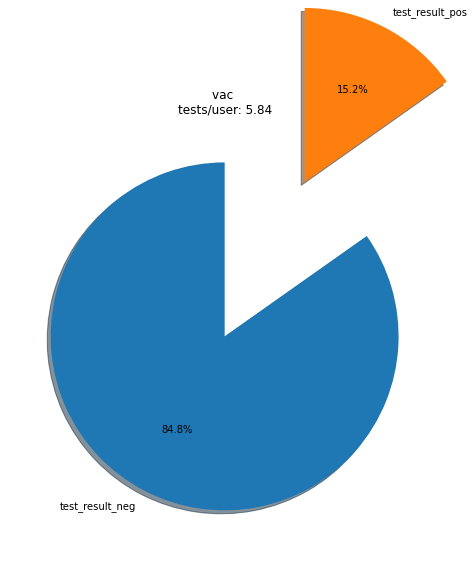

In [109]:
vaccinated = test_results.covid_result.value_counts()
vac_test_per_user = test_results.shape[0]/test_results.ALP_ID.unique().shape[0]
plt.figure(figsize = (10,8))
_ = plt.pie(vaccinated.values, explode=[0,1], labels=vaccinated.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
_ = plt.title("vaccinated users")
_ = plt.title("vac \n"+ "tests/user: "+ str(np.round(vac_test_per_user,2)))

In [94]:
test_results.shape[0]/test_results.ALP_ID.unique().shape[0]

5.836588720770289

In [103]:
m.shape[0]/m.ALP_ID.unique().shape[0]

6.767268862911796

array([ 2853,  3074,  3239, ..., 10330, 11046, 11161])

In [19]:
more_than_2_test = h.merged()
more_than_2_test = more_than_2_test[more_than_2_test.ALP_ID.isin(people[0])]

In [22]:
more_than_2_test = more_than_2_test[['ALP_ID', 'test_date']].groupby(['ALP_ID'], as_index = False).count()

In [26]:
more_than_2_test[more_than_2_test.test_date > 2].ALP_ID.values

array([ 3242,  3244,  3247, ...,  9799, 10076, 10330])

In [33]:
ii = np.invert(np.isin(obj.allIds, people[0]))
ohne_public = obj.allIds[ii]

In [34]:
age = h.answer("participant_year_born", 'year')
age = age[age.ALP_ID.isin(ohne_public)].year.values

In [40]:
age = age.astype(int)
age = 2022 - age

/Users/raza.ali/Documents/Analysis/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

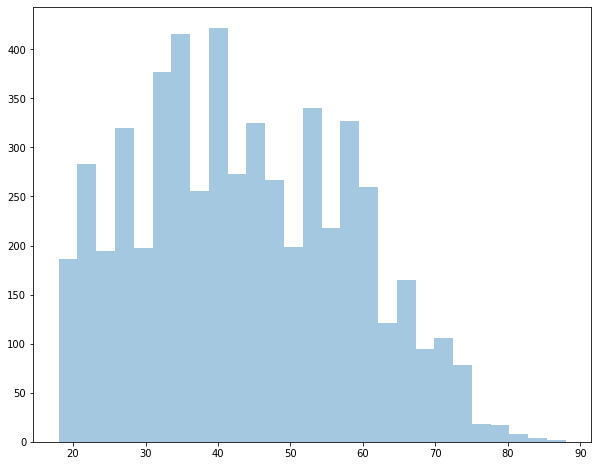

In [43]:
plt.figure(figsize = (10,8))
sns.distplot(x = age, norm_hist = False, kde = False)

In [47]:
bins = [10,30,50,70,90]
lab = ['10-29', '30-49','50-69','70-89']
ii = pd.cut(age, bins = bins, labels = lab,include_lowest = True).value_counts()

In [48]:
ii.va

10-29    1180
30-49    2429
50-69    1686
70-89     178
dtype: int64

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   3,
         1,   3,   0,   0,   0,   3,   3,   3,   2,   1,   7,   1,   2,
        17,  19,  14,  42,  49,  29,  24,  19,  42,   9,   5,   4, 104,
        11,  10,   6, 129,   7,  17,   8,  71,   6,   5,   4, 114,  10])

#### how many enrolled after 13 dec still receiving emails


In [30]:
imp = h.important_dates()
imp = imp[imp.START_DATE>= date(2021, 12, 13)]
dec = obj.mat[np.isin(obj.allIds, imp.ALP_ID.values), :]

In [31]:
print("Total users enrolled after 13 dec 2021 = ", imp.shape[0])
print("Users inactive for atleast last 8 weeks", np.sum(dec[:,-1] == -1))
print("Users inactive for atleast last 9 weeks",np.sum((dec[:,-1] == -1) & (dec[:,-2] == -1)))
print("Active users", np.sum(dec[:,-1] != -1))

Total users enrolled after 13 dec 2021 =  2486
Users inactive for atleast last 8 weeks 893
Users inactive for atleast last 9 weeks 767
Active users 1593


In [80]:
imp = h.important_dates()
imp = imp[imp.START_DATE<= date(2021, 12, 13)]
beforeDec = obj.mat[np.isin(obj.allIds, imp.ALP_ID.values), :]

In [81]:
active_ids = obj.allIds[np.isin(obj.allIds, imp.ALP_ID.values)]
active_ids = active_ids[beforeDec[:, -1] != -1]

In [82]:
print("total users enrolled before 13 dec", beforeDec.shape[0])
print("active users", np.sum(beforeDec[:, -1] != -1))

total users enrolled before 13 dec 6161
active users 1129


In [83]:
imp = imp[imp.ALP_ID.isin(active_ids)]
imp['active_start_dates'] = imp.START_DATE.apply(lambda x: x.isocalendar()[:2])
imp = imp[['active_start_dates', 'ALP_ID']].groupby(['active_start_dates'], as_index = False).nunique()


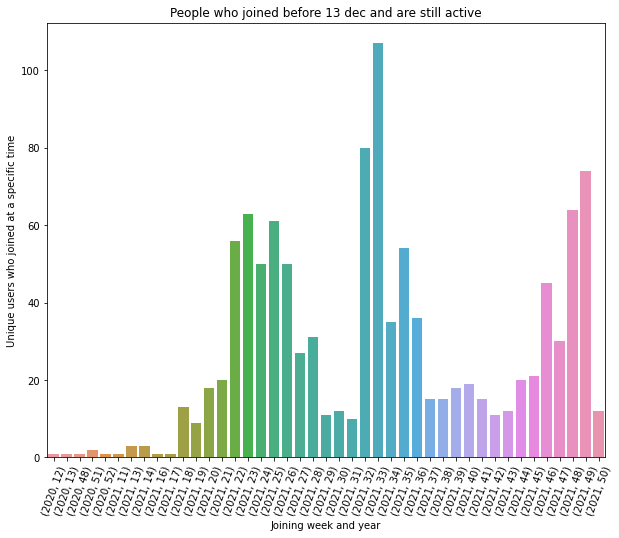

In [87]:
plt.figure(figsize = (10,8))
sns.barplot(x = imp.active_start_dates, y = imp.ALP_ID)
_ = plt.xticks(rotation = 70)
plt.xlabel("Joining week and year")
plt.ylabel("Unique users who joined at a specific time")
_ = plt.title("People who joined before 13 dec and are still active")

## last 90 days

In [18]:
h = helper(res)
imp = h.important_dates()
last_90 = imp[imp.LAST_DONATION >= date(2022, 2, 1)]
last_exposition = last_90[last_90.LAST_DONATION >= date(2022, 5, 4)]

In [19]:
print("total users active within 90 days",last_90.ALP_ID.unique().shape[0])
print("number of users who filled last exposition", last_exposition.ALP_ID.unique().shape[0])

total users active within 90 days 3529
number of users who filled last exposition 1046


In [25]:
res[(res.QUESTIONNAIRE == 'covid_exposition') & (res.AUTHORED >= date(2022, 5, 4))].ALP_ID.unique().shape[0]

1001

In [39]:
active = res[res.ALP_ID.isin(last_90.ALP_ID)]
gender = active.loc[active.LINK_ID == 'participant_gender', ['ALP_ID', 'VALUECODING_CODE']]
gender.drop_duplicates(inplace = True)

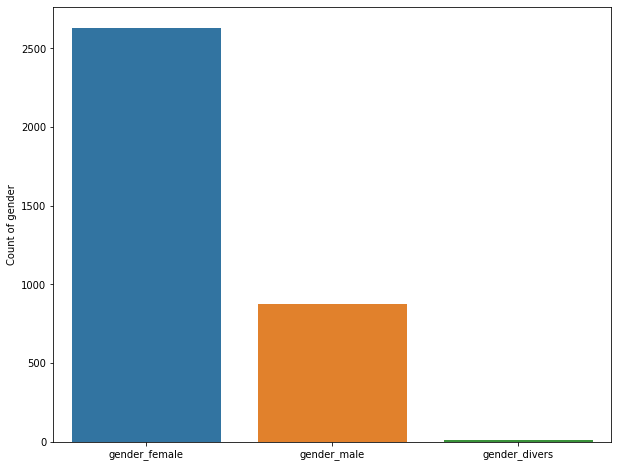

In [45]:
g = gender.VALUECODING_CODE.value_counts()
plt.figure(figsize = (10,8))
sns.barplot(x = g.index, y = g.values)
_ = plt.ylabel("Count of gender")

In [51]:
active = res[res.ALP_ID.isin(last_90.ALP_ID)]
age = active.loc[active.LINK_ID == 'participant_year_born', ['ALP_ID', 'VALUE']]
age['VALUE'] = 2022 - pd.to_numeric(age['VALUE'])
age.columns = ['ALP_ID', 'AGE']
age.drop_duplicates(inplace = True)

In [64]:
def age_bracket(row):
    if (row.AGE >= 10) & (row.AGE <20):
        return '10-20 yrs'
    
    if (row.AGE >= 20) & (row.AGE <30):
        return '20-30 yrs'
        
    if (row.AGE >= 30) & (row.AGE <40):
        return '30-40 yrs'
    
    if (row.AGE >= 40) & (row.AGE <50):
        return '40-50 yrs'
    
    if (row.AGE >= 50) & (row.AGE <60):
        return '50-60 yrs'
    
    if (row.AGE >= 60):
        return '>60 yrs'

In [65]:
age['age_bracket'] = age.apply(age_bracket, axis = 1)

In [66]:
age.head()

,ALP_ID,AGE,age_bracket
206,1496,56,50-60 yrs
466,1498,47,40-50 yrs
781,1500,54,50-60 yrs
925,1501,54,50-60 yrs
1068,1502,50,50-60 yrs


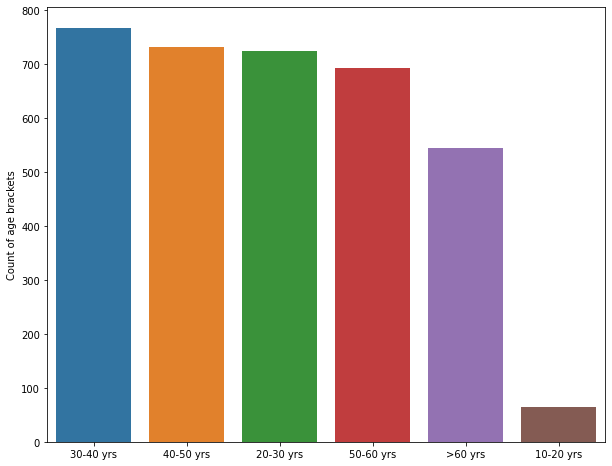

In [67]:
a = age.age_bracket.value_counts()
plt.figure(figsize = (10,8))
sns.barplot(x = a.index, y = a.values)
_ = plt.ylabel("Count of age brackets")

In [5]:
exp = res[res.QUESTIONNAIRE=='covid_exposition']
exp = exp[['ALP_ID', 'AUTHORED']].groupby(['ALP_ID'], as_index = False).max()
print("total users with exposition:", exp.ALP_ID.unique().shape[0])
print("exposure filled in last 90 days:", exp[exp.AUTHORED >= date(2022, 2, 1)].shape[0])
print("exposure filled this month:", exp[exp.AUTHORED >= date(2022, 5, 4)].shape[0])

total users with exposition: 4871
exposure filled in last 90 days: 2397
exposure filled this month: 1001


In [87]:
exp[exp.AUTHORED >= date(2022, 5, 4)].groupby(['AUTHORED'], as_index = False).nunique()

,AUTHORED,ALP_ID
0,2022-05-04,715
1,2022-05-05,102
2,2022-05-06,37
3,2022-05-07,19
4,2022-05-08,19
5,2022-05-09,11
6,2022-05-10,18
7,2022-05-11,50
8,2022-05-12,15
9,2022-05-13,9


In [92]:
exp = res[res.QUESTIONNAIRE=='covid_exposition']
exp = exp[exp.AUTHORED >= date(2022, 2, 1)]
exp = exp[['ALP_ID', 'AUTHORED']].groupby(['AUTHORED'], as_index = False).nunique()

In [93]:
exp[exp.ALP_ID > 100]

,AUTHORED,ALP_ID
8,2022-02-09,1074
9,2022-02-10,128
35,2022-03-09,1017
36,2022-03-10,133
63,2022-04-06,879
64,2022-04-07,117
70,2022-04-13,127
91,2022-05-04,715
92,2022-05-05,102


In [25]:
from dateutil.relativedelta import relativedelta
h = helper(res)
imp = h.important_dates()
last_90 = imp[imp.LAST_DONATION >= date(2022, 2, 1)]
last_exposition = last_90[last_90.LAST_DONATION >= date(2022, 5, 4)]

In [30]:
months_to_analyse = 8
dates_to_check = [date(2021, 10, 1) + relativedelta(months=i) for i in range(months_to_analyse)]
active = []
imp = h.important_dates()
for d in dates_to_check:
    lower = d - relativedelta(months=3)
    active.append(res[(res.AUTHORED >= lower) & (res.AUTHORED < d)].ALP_ID.unique().shape[0])

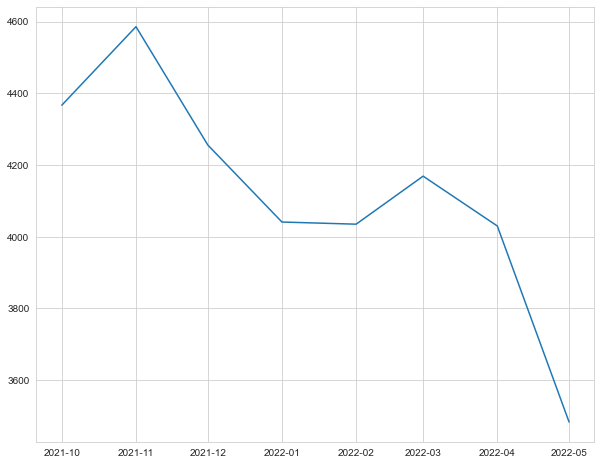

In [31]:
plt.figure(figsize = (10,8))
plt.plot(dates_to_check, active)

In [40]:
res['year'] = res.AUTHORED.apply(lambda x: x.isocalendar()[0])
res['week'] = res.AUTHORED.apply(lambda x: x.isocalendar()[1])
res['week_year'] = res["year"].astype(str) +'-W' + res['week'].astype(str)

In [42]:
df = res[res.AUTHORED >= date(2021, 10, 1)]
df[['week_year', 'ALP_ID']].groupby(['week_year'], as_index = False).nunique()

,week_year,ALP_ID
0,2021-W39,127
1,2021-W40,1119
2,2021-W41,585
3,2021-W42,1310
4,2021-W43,563
5,2021-W44,594
6,2021-W45,496
7,2021-W46,740
8,2021-W47,323
9,2021-W48,442


In [4]:
res[(res.AUTHORED >= date(2022, 1, 1)) & (res.AUTHORED <= date(2022, 5, 2))].ALP_ID.unique().shape

(4322,)

## last week

In [11]:
last_week = res[res.AUTHORED >= date(2022, 5, 19)]
last_week[['QUESTIONNAIRE', 'ALP_ID']].groupby(['QUESTIONNAIRE'], as_index = False).nunique()

,QUESTIONNAIRE,ALP_ID
0,corona_symptoms,24
1,corona_testing,57
2,covid_booster_vaccine,20
3,covid_exposition,19
4,covid_first_vaccine,24
5,covid_second_vaccine,18
6,personal_info,24
7,vaccination_side_effects_a,21
8,vaccination_side_effects_b,18
9,vaccination_side_effects_c,17


In [12]:
last_week.ALP_ID.unique().shape[0]

78

In [8]:
last_week.head()

,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT,QUESTIONNAIRE_ID
9854,1626,1.2.0,2022-05-21,corona_testing,when_tested_on_demand,2022-05-15,NaN,de,Wann wurde der Test durchgef\'c3\'bchrt?,atfQHq6t11BzrzkOZApKVYURvzbNtKMb0jFIrKgMPGuxrS...
9855,1626,1.2.0,2022-05-21,corona_testing,what_test_method,NaN,self_swab,de,Mit welchem Testverfahren?,atfQHq6t11BzrzkOZApKVYURvzbNtKMb0jFIrKgMPGuxrS...
9856,1626,1.2.0,2022-05-21,corona_testing,corona_test_result,NaN,test_result_neg,de,Wie war Ihr Testergebnis?,atfQHq6t11BzrzkOZApKVYURvzbNtKMb0jFIrKgMPGuxrS...
9857,1626,1.2.0,2022-05-21,corona_testing,when_tested_on_demand,2022-05-20,NaN,de,Wann wurde der Test durchgef\'c3\'bchrt?,R+zzvLAPZgqVtE+9/ytS1eI7YaBAA5cl6Ep1TrtBBjpZKS...
9858,1626,1.2.0,2022-05-21,corona_testing,what_test_method,NaN,antigen_test,de,Mit welchem Testverfahren?,R+zzvLAPZgqVtE+9/ytS1eI7YaBAA5cl6Ep1TrtBBjpZKS...


In [20]:
b = last_week[(last_week.QUESTIONNAIRE == 'covid_booster_vaccine') & (last_week.AUTHORED == date(2022, 5, 24))]
#.ALP_ID.unique().shape[0]
#b[['AUTHORED', 'ALP_ID']].groupby(['AUTHORED'], as_index = False).nunique()
b


,ALP_ID,VERSION,AUTHORED,QUESTIONNAIRE,LINK_ID,VALUE,VALUECODING_CODE,LANGUAGE,TEXT,QUESTIONNAIRE_ID
533415,13535,1.0.0,2022-05-24,covid_booster_vaccine,has_received_booster_vacciation,NaN,yes,de,Haben Sie eine Auffrischimpfung gegen COVID-19...,d7OfKsYRQa9veWdzOy6Hki9pdLQ230URDJRHhC68F2MpR1...
533416,13535,1.0.0,2022-05-24,covid_booster_vaccine,which_vaccine_received,NaN,moderna,de,Welchen Impfstoff gegen COVID-19 haben Sie erh...,d7OfKsYRQa9veWdzOy6Hki9pdLQ230URDJRHhC68F2MpR1...
533417,13535,1.0.0,2022-05-24,covid_booster_vaccine,when_vaccinated_booster,2021-12-27,NaN,de,Wann wurden Sie zur Auffrischung geimpft?,d7OfKsYRQa9veWdzOy6Hki9pdLQ230URDJRHhC68F2MpR1...
533421,13535,1.0.0,2022-05-24,covid_booster_vaccine,has_received_booster_vacciation,NaN,yes,de,Haben Sie eine Auffrischimpfung gegen COVID-19...,lc0YuW4W9QxUmvPo4jd3Ss89XMpEYUJeFjncidHPIpAJ+w...
533422,13535,1.0.0,2022-05-24,covid_booster_vaccine,when_vaccinated_booster,2022-04-26,NaN,de,Wann wurden Sie zur Auffrischung geimpft?,lc0YuW4W9QxUmvPo4jd3Ss89XMpEYUJeFjncidHPIpAJ+w...
533423,13535,1.0.0,2022-05-24,covid_booster_vaccine,which_vaccine_received,NaN,pfizer,de,Welchen Impfstoff gegen COVID-19 haben Sie erh...,lc0YuW4W9QxUmvPo4jd3Ss89XMpEYUJeFjncidHPIpAJ+w...
533474,13536,1.0.0,2022-05-24,covid_booster_vaccine,has_received_booster_vacciation,NaN,yes,de,Haben Sie eine Auffrischimpfung gegen COVID-19...,yy8mHk/0sdimSBrLYoPo217ladWLit4eM68d07+6TY1FLQ...
533475,13536,1.0.0,2022-05-24,covid_booster_vaccine,which_vaccine_received,NaN,moderna,de,Welchen Impfstoff gegen COVID-19 haben Sie erh...,yy8mHk/0sdimSBrLYoPo217ladWLit4eM68d07+6TY1FLQ...
533476,13536,1.0.0,2022-05-24,covid_booster_vaccine,when_vaccinated_booster,2021-12-07,NaN,de,Wann wurden Sie zur Auffrischung geimpft?,yy8mHk/0sdimSBrLYoPo217ladWLit4eM68d07+6TY1FLQ...
533477,13536,1.0.0,2022-05-24,covid_booster_vaccine,vaccine_lot_number,092F21A,NaN,de,Bitte nennen Sie m\'c3\'b6glichst die Chargenn...,yy8mHk/0sdimSBrLYoPo217ladWLit4eM68d07+6TY1FLQ...


In [16]:
res.AUTHORED.max()

datetime.date(2022, 5, 25)